In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
os.chdir('/home/seidi/Repositories/mestrado_final/')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

import utils
# Reading data
# mb = utils.read_mb()
# mb = utils.read_int_mb()
# mb = mb[mb.k_searching == 30]
# mf = utils.read_mf()

## Preparing data

In [9]:
recs = pd.read_csv('src/notebooks/dissertation/final_recs.csv')

datasets = {
    'texture': 'Texture',
    'moments': 'Moments',
    'colorHisto': 'Histogram',
    'sift': 'SIFT',
    'mnist': 'MNIST',
    'mnist121d': 'MNIST121d',
    'fashion': 'Fashion-MNIST',
    'cophir282': 'Cophir282',
    'cophir64': 'Cophir64',
    'base71': 'Syn71', 
    'base74': 'Syn74', 
    'base68': 'Syn68',
    'base72': 'Syn72',
    'base70': 'Syn70',
    
    
}
recs.Dataset = recs.Dataset.map(lambda x: datasets.get(x, x))

approaches = {
    'gmm': 'GMM',
    'gmm+': 'GMM+',
    'tmmgs': 'TMM-GS',
    'tmmgs+': 'TMM-GS+',
    'tmms': 'TMM-S',
    'tmms+': 'TMM-S+',  
    'Light': 'Loose',
    'Heavy': 'Tight'  
}
recs.approach = recs.approach.map(lambda x: approaches.get(x, x))

graph_type = {
    0: 'NSW',
    1: 'NNDescent',
    2: 'Brute-kNNG',  
}
recs.graph_type = recs.graph_type.map(lambda x: graph_type.get(x, x))

recs = recs.rename(columns={
    'approach': 'Approach',
    'graph_type': 'Graph Algorithm'
})

data_order = ['Moments', 'Histogram', 'Texture', 'MNIST121d', 'MNIST', 'Fashion-MNIST', 'SIFT', 'Cophir282', 'Cophir64', 'Syn71']#, 'Syn74', 'Syn68', 'Syn72', 'Syn70']
recs.set_index('Dataset', inplace=True)
recs = recs.loc[data_order, :].reset_index()
recs.head()

Dataset     NN     R Graph Algorithm    Approach  Distance Computations  \
0  Moments  100.0   1.0       NNDescent  GridSearch             691.252000   
1  Moments   85.0   1.0       NNDescent     Optimal             611.772956   
2  Moments   70.0   6.0       NNDescent       Tight            3194.625642   
3  Moments  100.0  10.0       NNDescent       Loose            6983.960000   
4  Moments   50.0   5.0       NNDescent     TMM-GS+            2072.339825   

   y_true_IndexTime  Query Time (ms)  Recall  y_pred_DistComp  \
0          2.824938         0.225464    0.93         6.135109   
1          2.498762         0.215702    0.90         5.964165   
2          2.109090         0.319558    0.96         8.058064   
3          2.824938         0.459857    0.99         8.825947   
4          1.475675         0.260048    0.93         7.632958   

   y_pred_IndexTime  y_pred_QueryTime  y_pred_Recall optmizing  \
0          2.610694          0.186806           0.91        qt   
1          2.311525          0.175375           0.88        qt   
2          1.974934          0.238643           0.94        qt   
3          2.944849          0.349476           0.97        qt   
4          1.365795          0.268182           0.91        qt   

   required_recall  
0              0.9  
1              0.9  
2              0.9  
3              0.9  
4              0.9

# Quick methods

In [10]:
final_recommendations = recs[recs.Approach.isin(['Optimal', 'GMM', 'GMM+', 'Tight', 'Loose'])].copy()

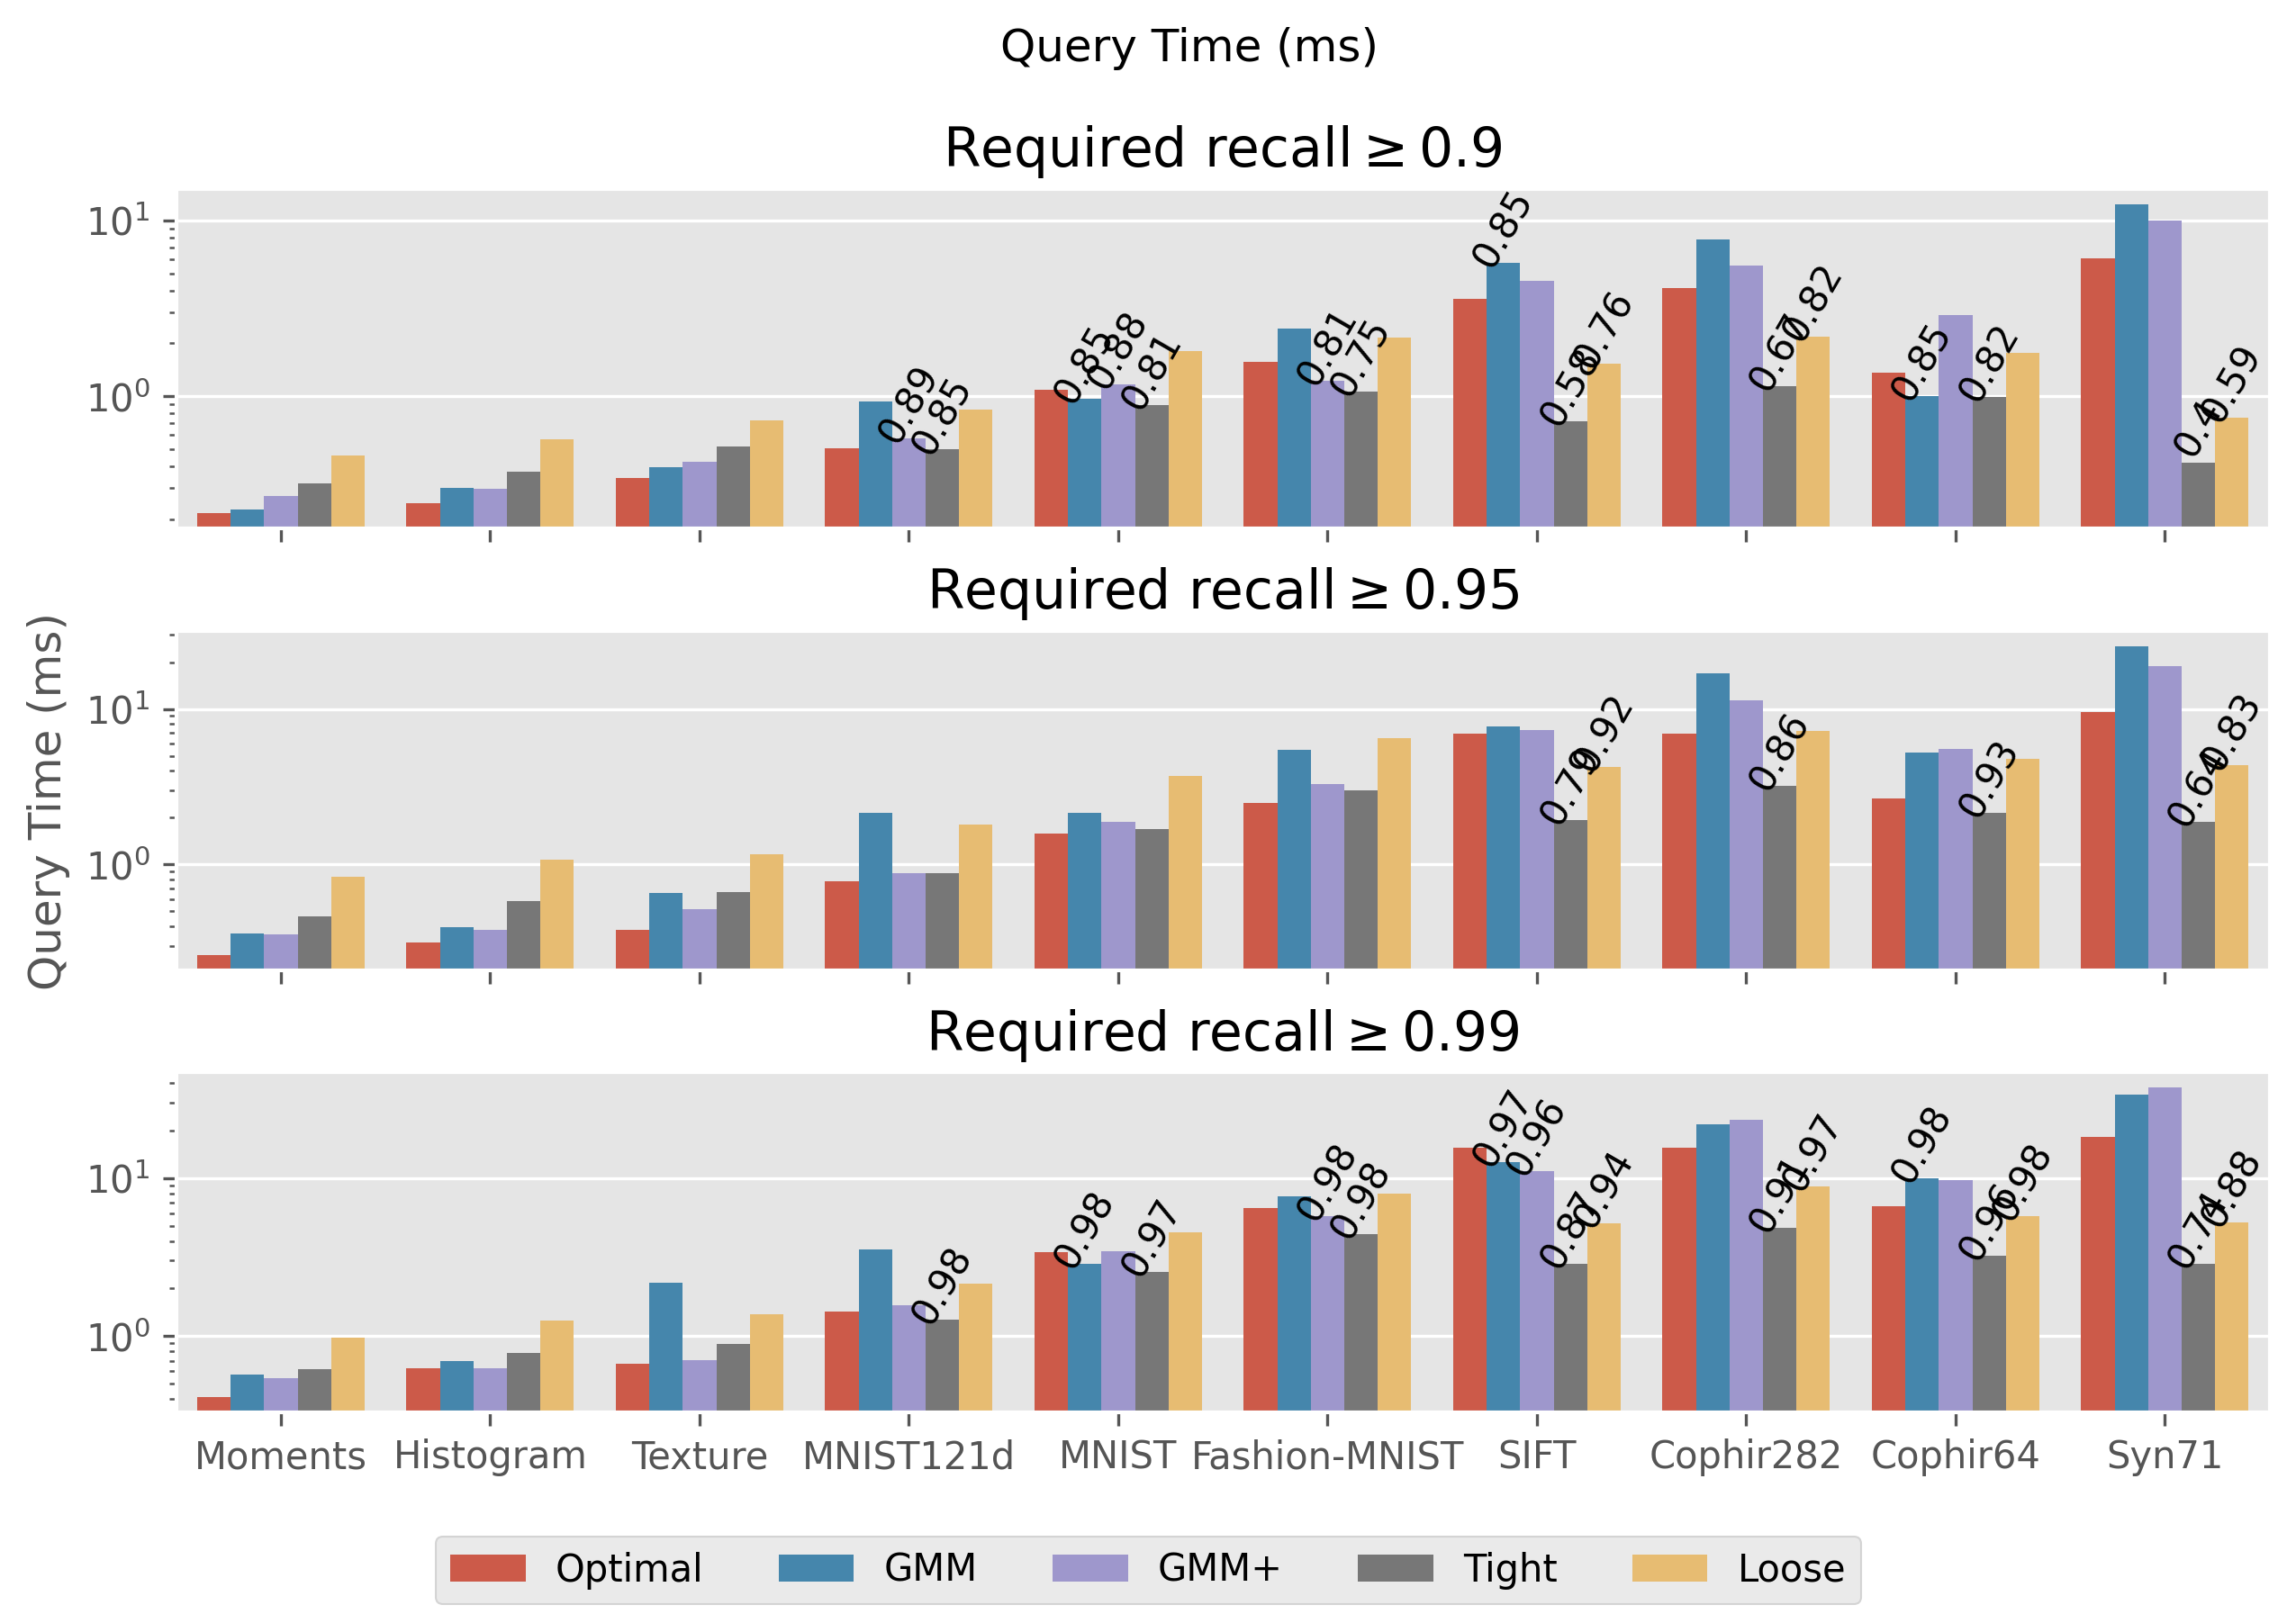

In [11]:
optimizing = 'qt'
y = 'Query Time (ms)'
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal/results'
hue_order = ['Optimal', 'GMM', 'GMM+', 'Tight', 'Loose']

fig, axes = plt.subplots(3,1, figsize=(10, 6), dpi=300, sharex=True)
axes = axes.reshape(-1)

for ax, required_recall in zip(axes, [0.9, 0.95, 0.99]):
    df = final_recommendations[(final_recommendations.optmizing == optimizing) & (final_recommendations.required_recall == required_recall)].copy()
    g = sns.barplot(x='Dataset', y=y, hue='Approach', hue_order=hue_order, data=df, ax=ax)
    test = df.copy()
    test.set_index('Approach', inplace=True)
    drop =  list(set(hue_order) - set(test.index.unique()))
    o = [h for h in hue_order if h not in drop]
    test = test.loc[o, :].reset_index()
    for ix, p in enumerate(g.patches):
        if ix == len(test):
            break
        tmp = test.loc[ix, :]
        if tmp.Dataset != 'Dataset' and tmp.Recall < tmp.required_recall:
            g.annotate(
                # format(p.get_height(), '.1f'),
                tmp.Recall,
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                size=10,
                rotation=60,
                textcoords = 'offset points'
                ) 
    if y != 'NN':
        ax.set_yscale('log')
    if required_recall != 0.95:
        ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(fr'Required recall$\geq{required_recall}$') # 
    ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5)
plt.subplots_adjust(hspace=0.3)
plt.suptitle(y)
# plt.savefig(f'{path}/quick_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)
# plt.savefig(f'/home/seidi/Desktop/quick_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

In [40]:
final_recommendations[(final_recommendations.optmizing == 'qt') & (final_recommendations.Dataset=='SIFT') & (final_recommendations.required_recall == .95)]

Dataset     NN     R Graph Algorithm Approach  Distance Computations  \
545    SIFT  140.0  20.0             NSW  Optimal           26187.936058   
546    SIFT  120.0   5.0             NSW    Tight            5977.232718   
547    SIFT  200.0   8.0             NSW    Loose           14658.384769   
551    SIFT  130.0  20.0             NSW     GMM+           24677.630160   
552    SIFT  100.0  80.0       NNDescent      GMM           53446.895771   

     y_true_IndexTime  Query Time (ms)  Recall  y_pred_DistComp  \
545          7.397027         6.951420    0.95        10.233046   
546          7.286043         1.934513    0.79         8.968082   
547          7.653822         4.209100    0.92         9.849168   
551          7.343672         6.575213    0.94        10.365795   
552          5.798292         9.594714    0.93        11.055687   

     y_pred_IndexTime  y_pred_QueryTime  y_pred_Recall optmizing  \
545          7.020389          8.315161           0.96        qt   
546          6.186937          2.519694           0.72        qt   
547          6.534638          5.405193           0.89        qt   
551          6.237912          8.988261           0.95        qt   
552          5.995557          3.678784           0.95        qt   

     required_recall  
545             0.95  
546             0.95  
547             0.95  
551             0.95  
552             0.95

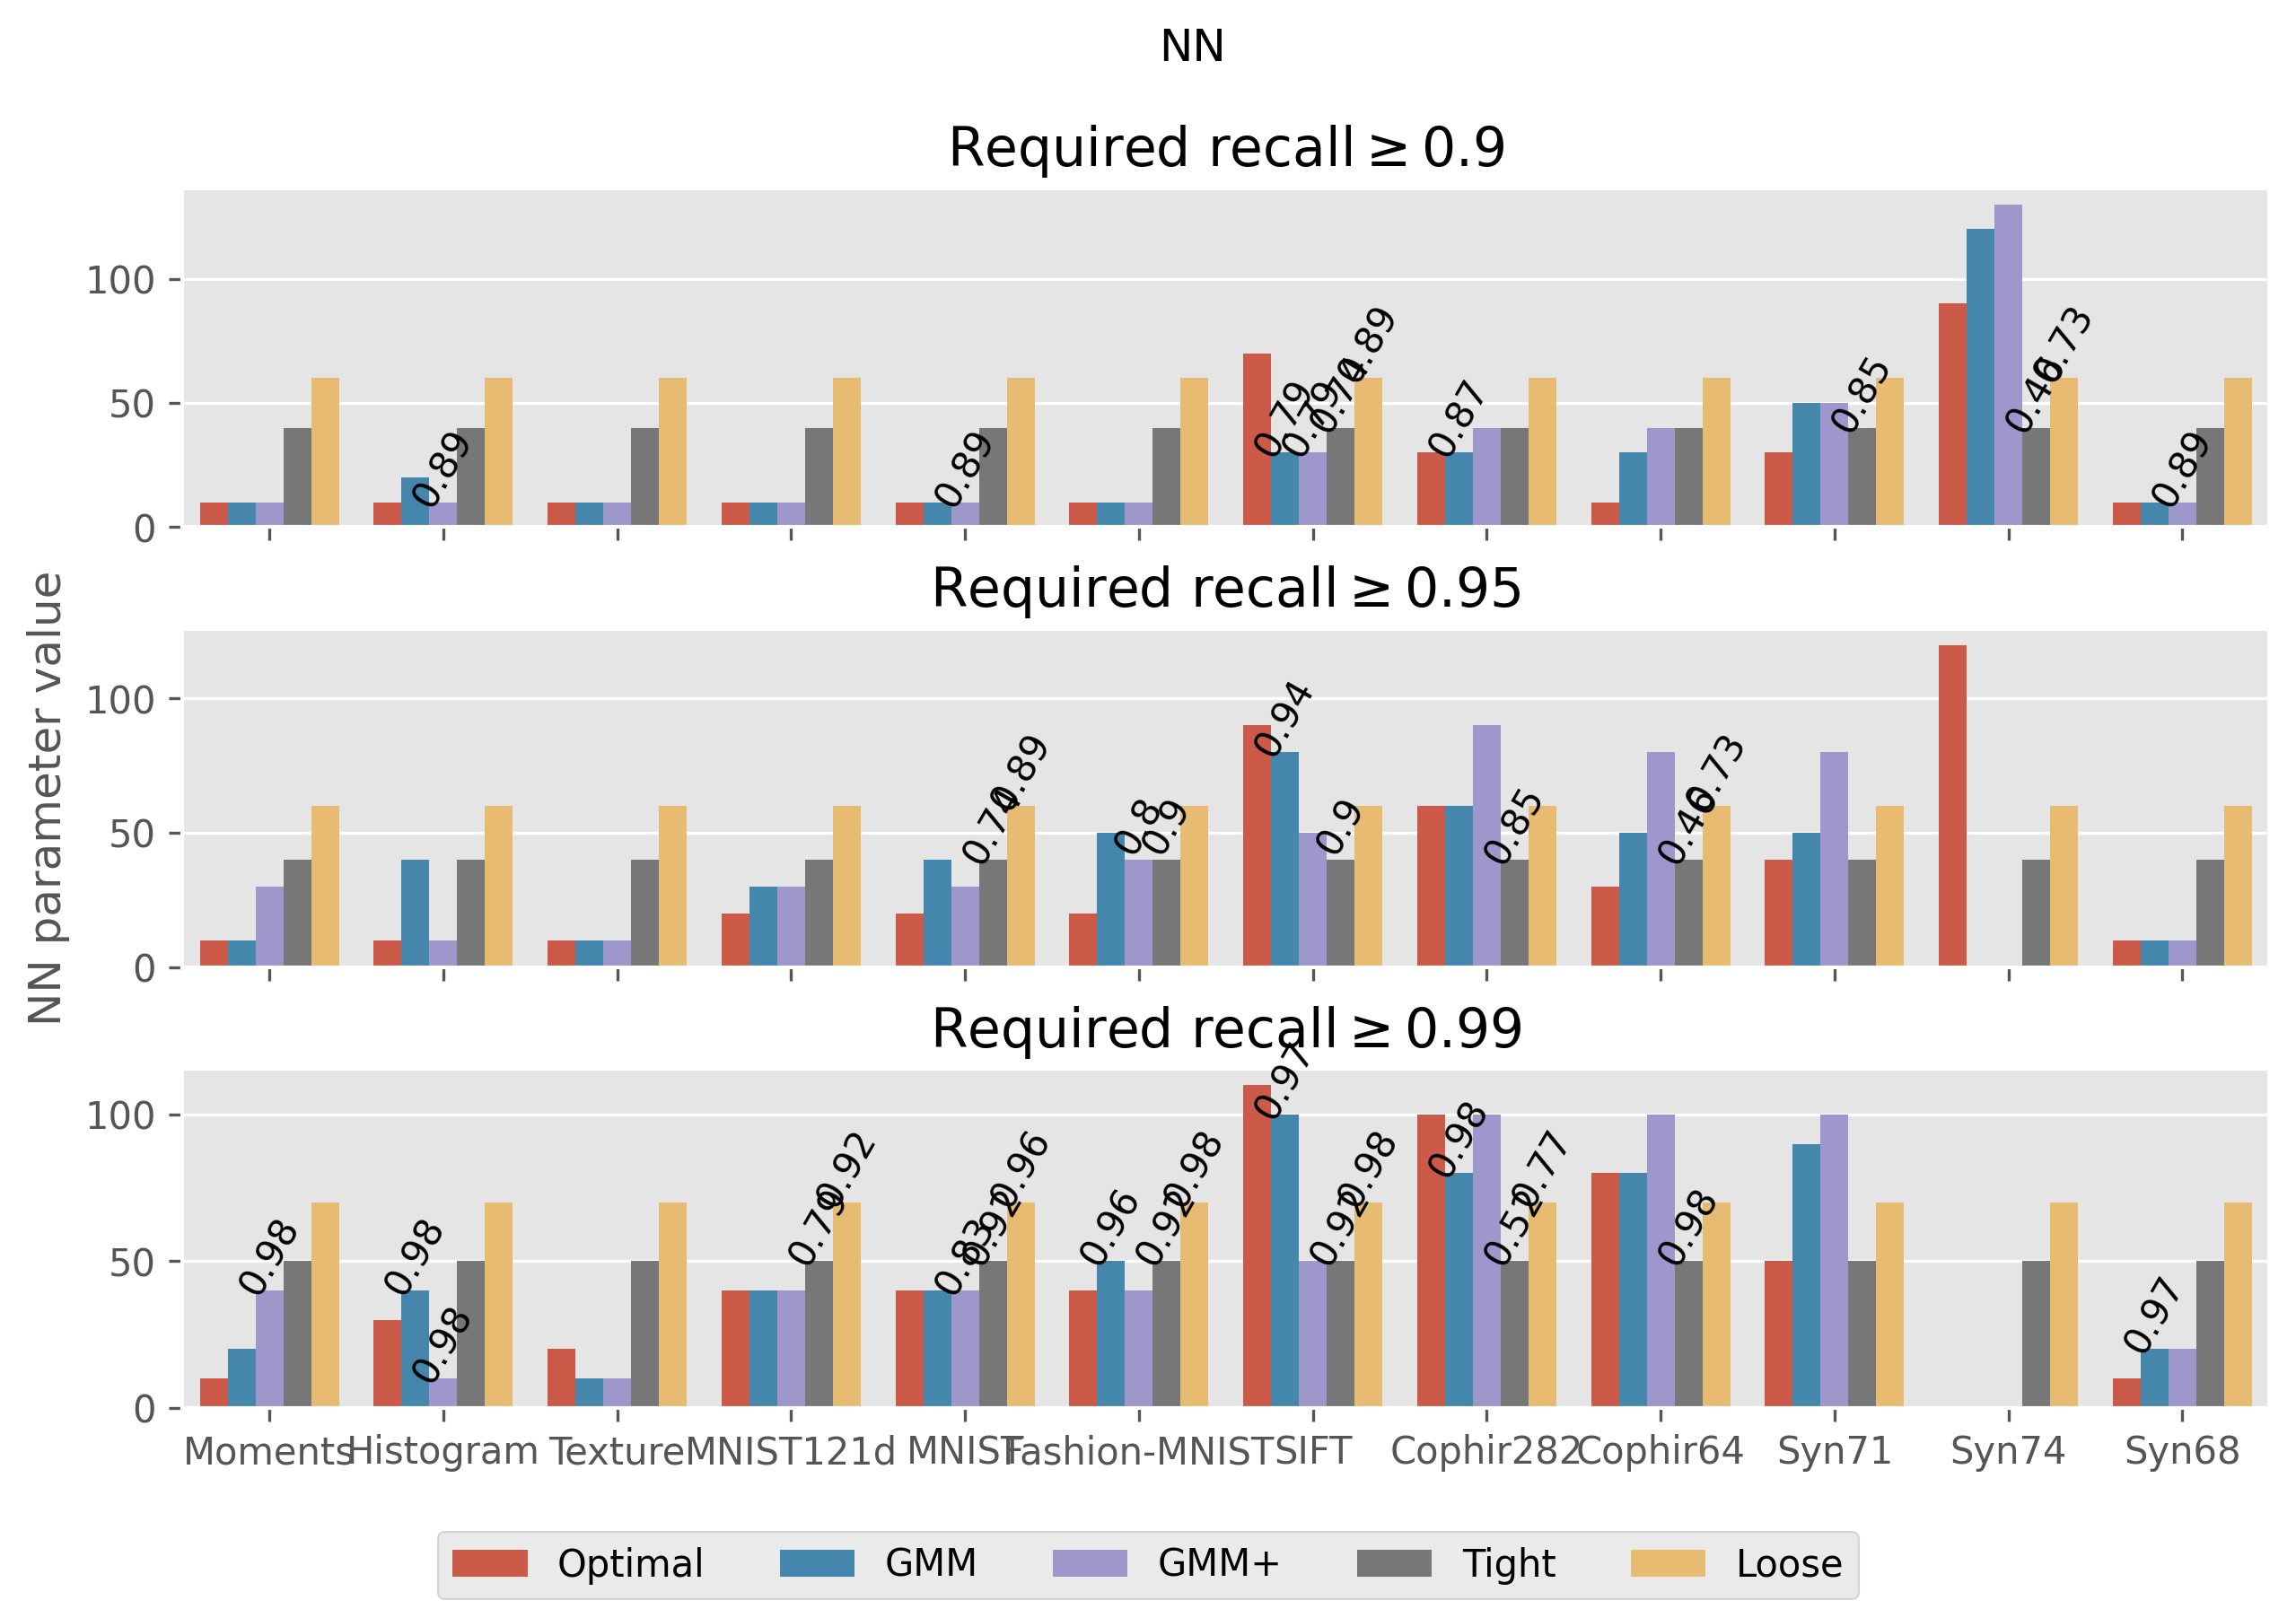

In [16]:
optimizing = 'nn'
y = 'NN'
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal/results'
hue_order = ['Optimal', 'GMM', 'GMM+', 'Tight', 'Loose']

fig, axes = plt.subplots(3,1, figsize=(10, 6), dpi=300, sharex=True)
axes = axes.reshape(-1)

# y = 'NN'
for ax, required_recall in zip(axes, [0.9, 0.95, 0.99]):
    df = final_recommendations[(final_recommendations.optmizing == optimizing) & (final_recommendations.required_recall == required_recall)].copy()
    g = sns.barplot(x='Dataset', y=y, hue='Approach', hue_order=hue_order, data=df, ax=ax)
    test = df.copy()
    test.set_index('Approach', inplace=True)
    drop =  list(set(hue_order) - set(test.index.unique()))
    o = [h for h in hue_order if h not in drop]
    test = test.loc[o, :].reset_index()
    for ix, p in enumerate(g.patches):
        if ix == len(test):
            break
        tmp = test.loc[ix, :]
        if tmp.Dataset != 'Dataset' and tmp.Recall < tmp.required_recall:
            g.annotate(
                # format(p.get_height(), '.1f'),
                tmp.Recall,
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                size=10, 
                rotation=60,
                textcoords = 'offset points'
                ) 
    if y != 'NN':
        ax.set_yscale('log')
    if required_recall != 0.95:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('NN parameter value')
    ax.set_xlabel('')
    ax.set_title(fr'Required recall$\geq{required_recall}$') # 
    ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5)
plt.subplots_adjust(hspace=0.3)
plt.suptitle(y)
# plt.savefig(f'{path}/quick_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.savefig(f'/home/seidi/Desktop/quick_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

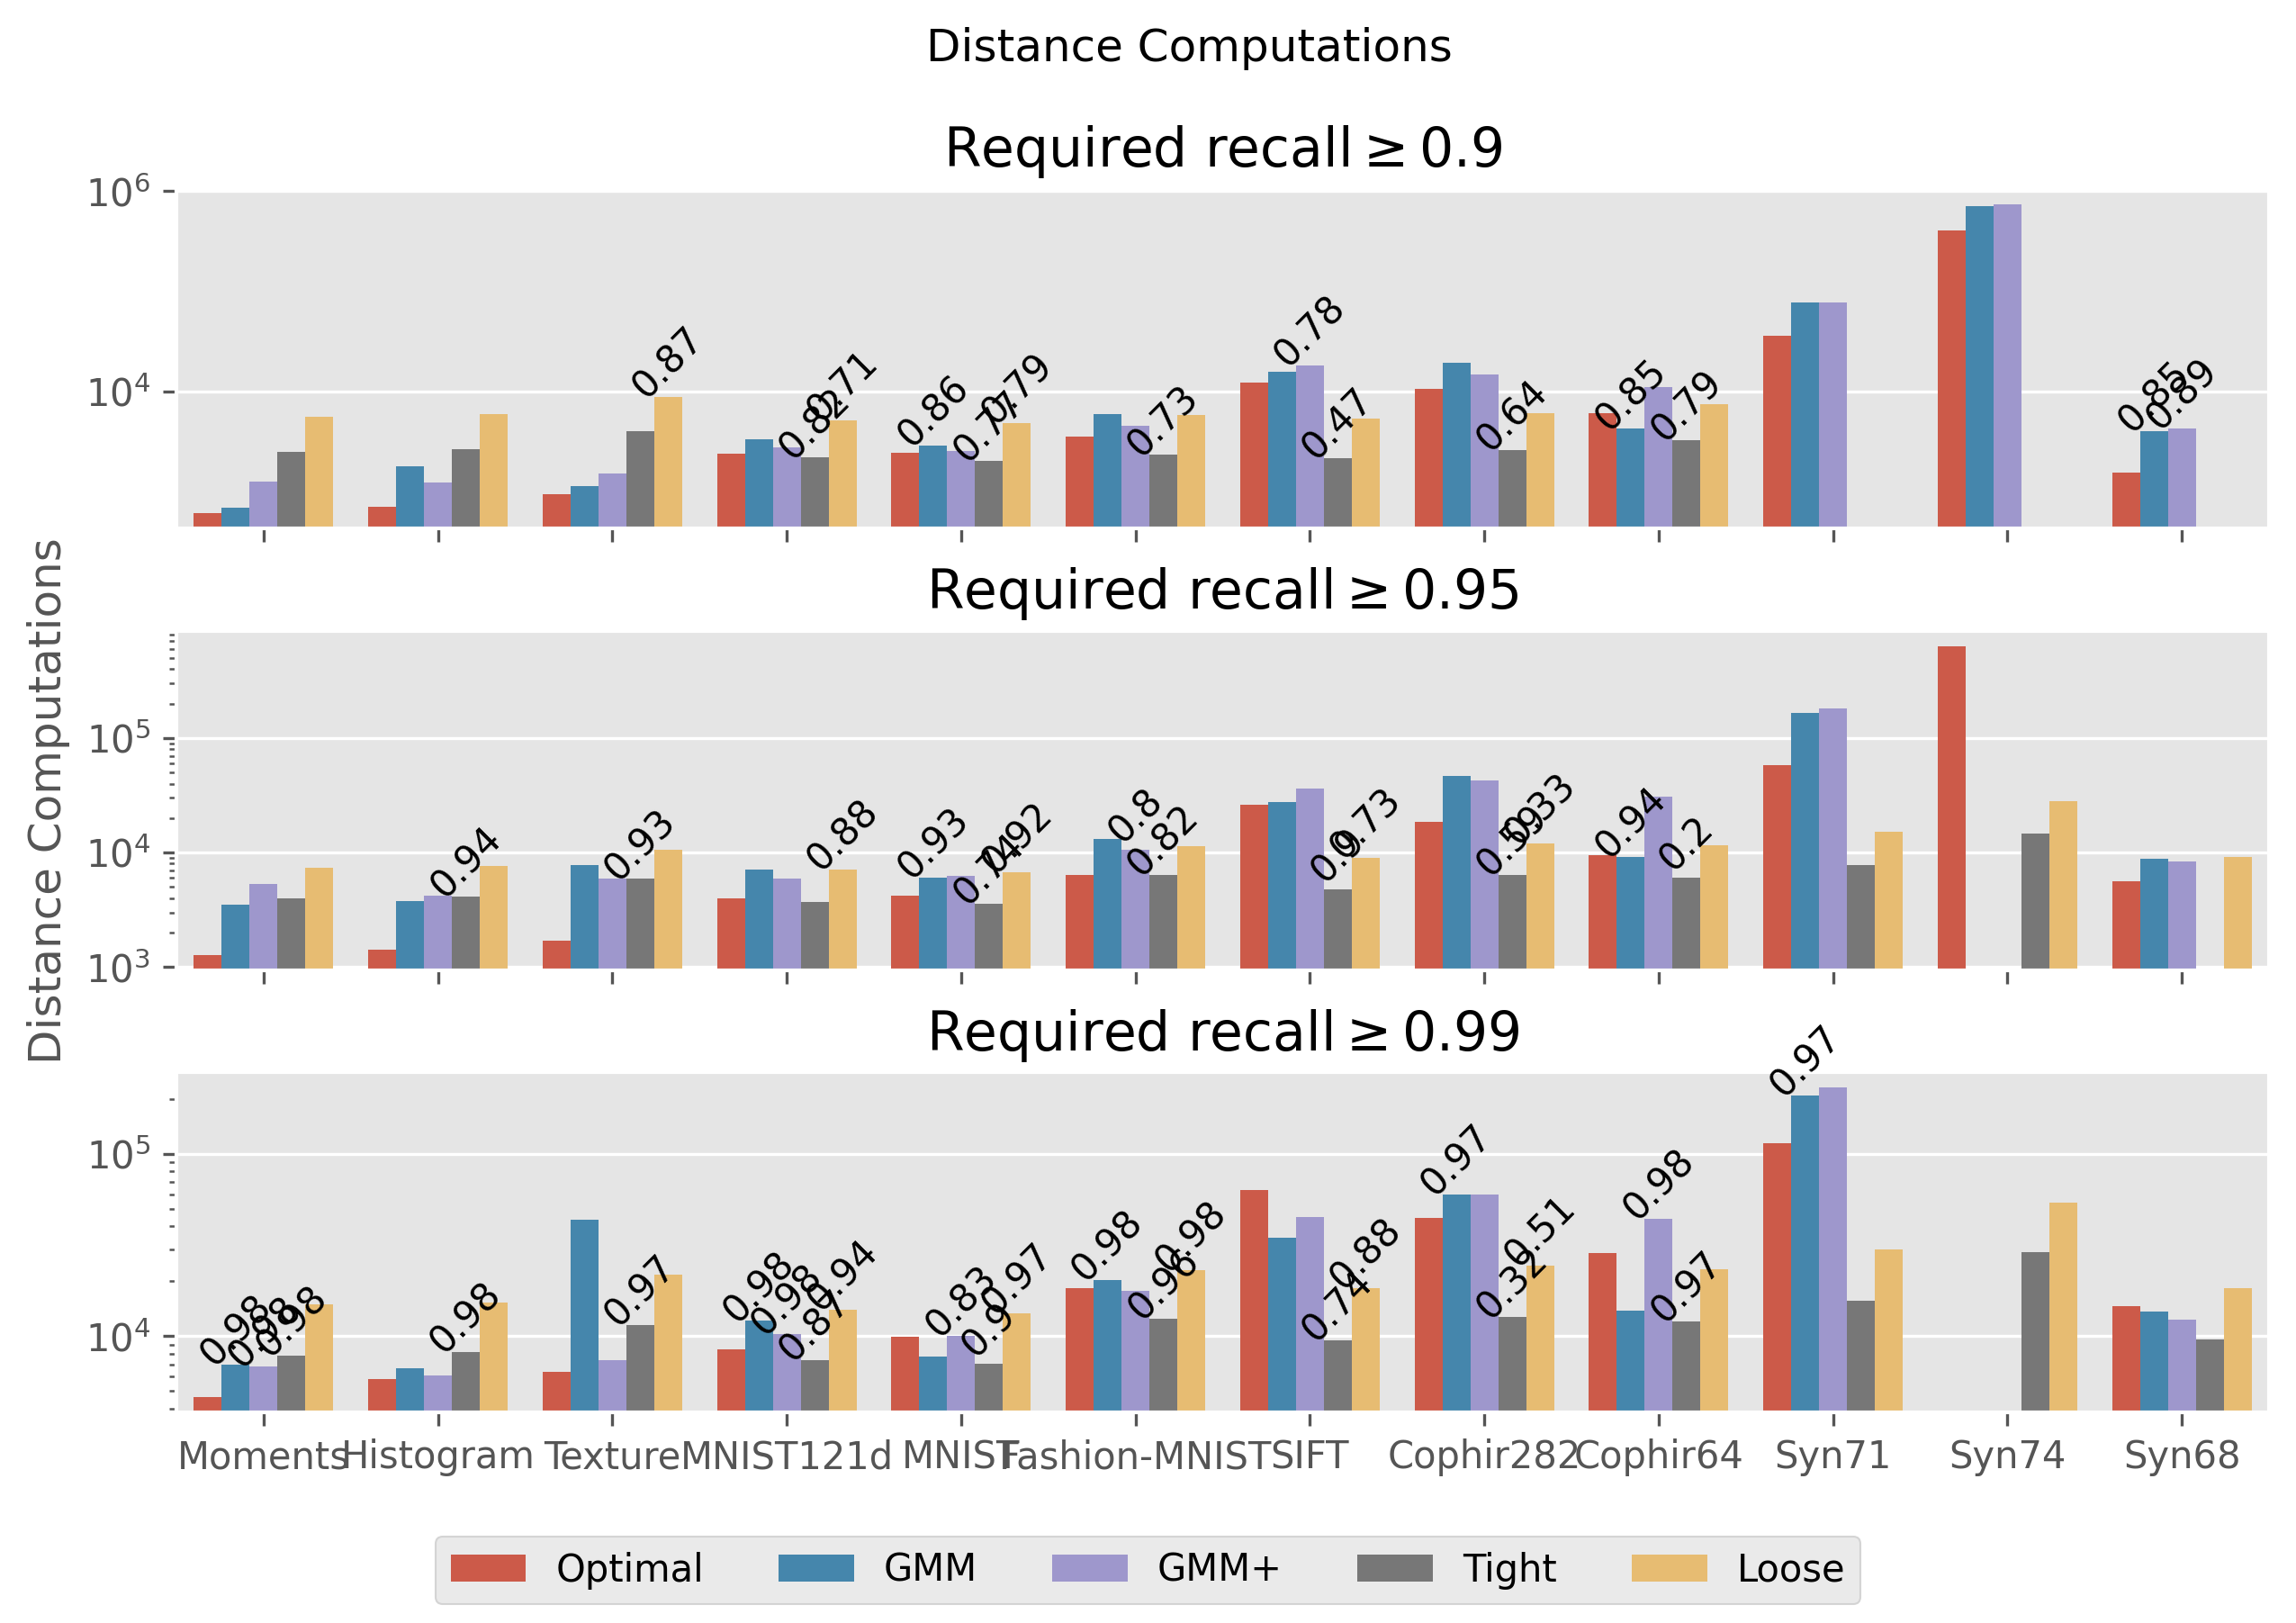

In [17]:
optimizing = 'dt'
y = 'Distance Computations'
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal/results'
hue_order = ['Optimal', 'GMM', 'GMM+', 'Tight', 'Loose']

fig, axes = plt.subplots(3,1, figsize=(10, 6), dpi=300, sharex=True)
axes = axes.reshape(-1)

# y = 'NN'
for ax, required_recall in zip(axes, [0.9, 0.95, 0.99]):
    df = final_recommendations[(final_recommendations.optmizing == optimizing) & (final_recommendations.required_recall == required_recall)].copy()
    g = sns.barplot(x='Dataset', y=y, hue='Approach', hue_order=hue_order, data=df, ax=ax)
    test = df.copy()
    test.set_index('Approach', inplace=True)
    drop =  list(set(hue_order) - set(test.index.unique()))
    o = [h for h in hue_order if h not in drop]
    test = test.loc[o, :].reset_index()
    for ix, p in enumerate(g.patches):
        if ix == len(test):
            break
        tmp = test.loc[ix, :]
        if tmp.Dataset != 'Dataset' and tmp.Recall < tmp.required_recall:
            g.annotate(
                # format(p.get_height(), '.1f'),
                tmp.Recall,
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                size=10, 
                rotation=45,
                textcoords = 'offset points'
                ) 
    if y != 'NN':
        ax.set_yscale('log')
    if required_recall != 0.95:
        ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(fr'Required recall$\geq{required_recall}$') # 
    ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5)
plt.subplots_adjust(hspace=0.3)
plt.suptitle(y)
plt.savefig(f'/home/seidi/Desktop/quick_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)
# plt.savefig(f'{path}/quick_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

## Tuned methods

In [30]:
final_recommendations = recs[recs.Approach.isin(['Optimal', 'GridSearch', 'TMM-GS', 'TMM-GS+', 'TMM-S', 'TMM-S+'])].copy()

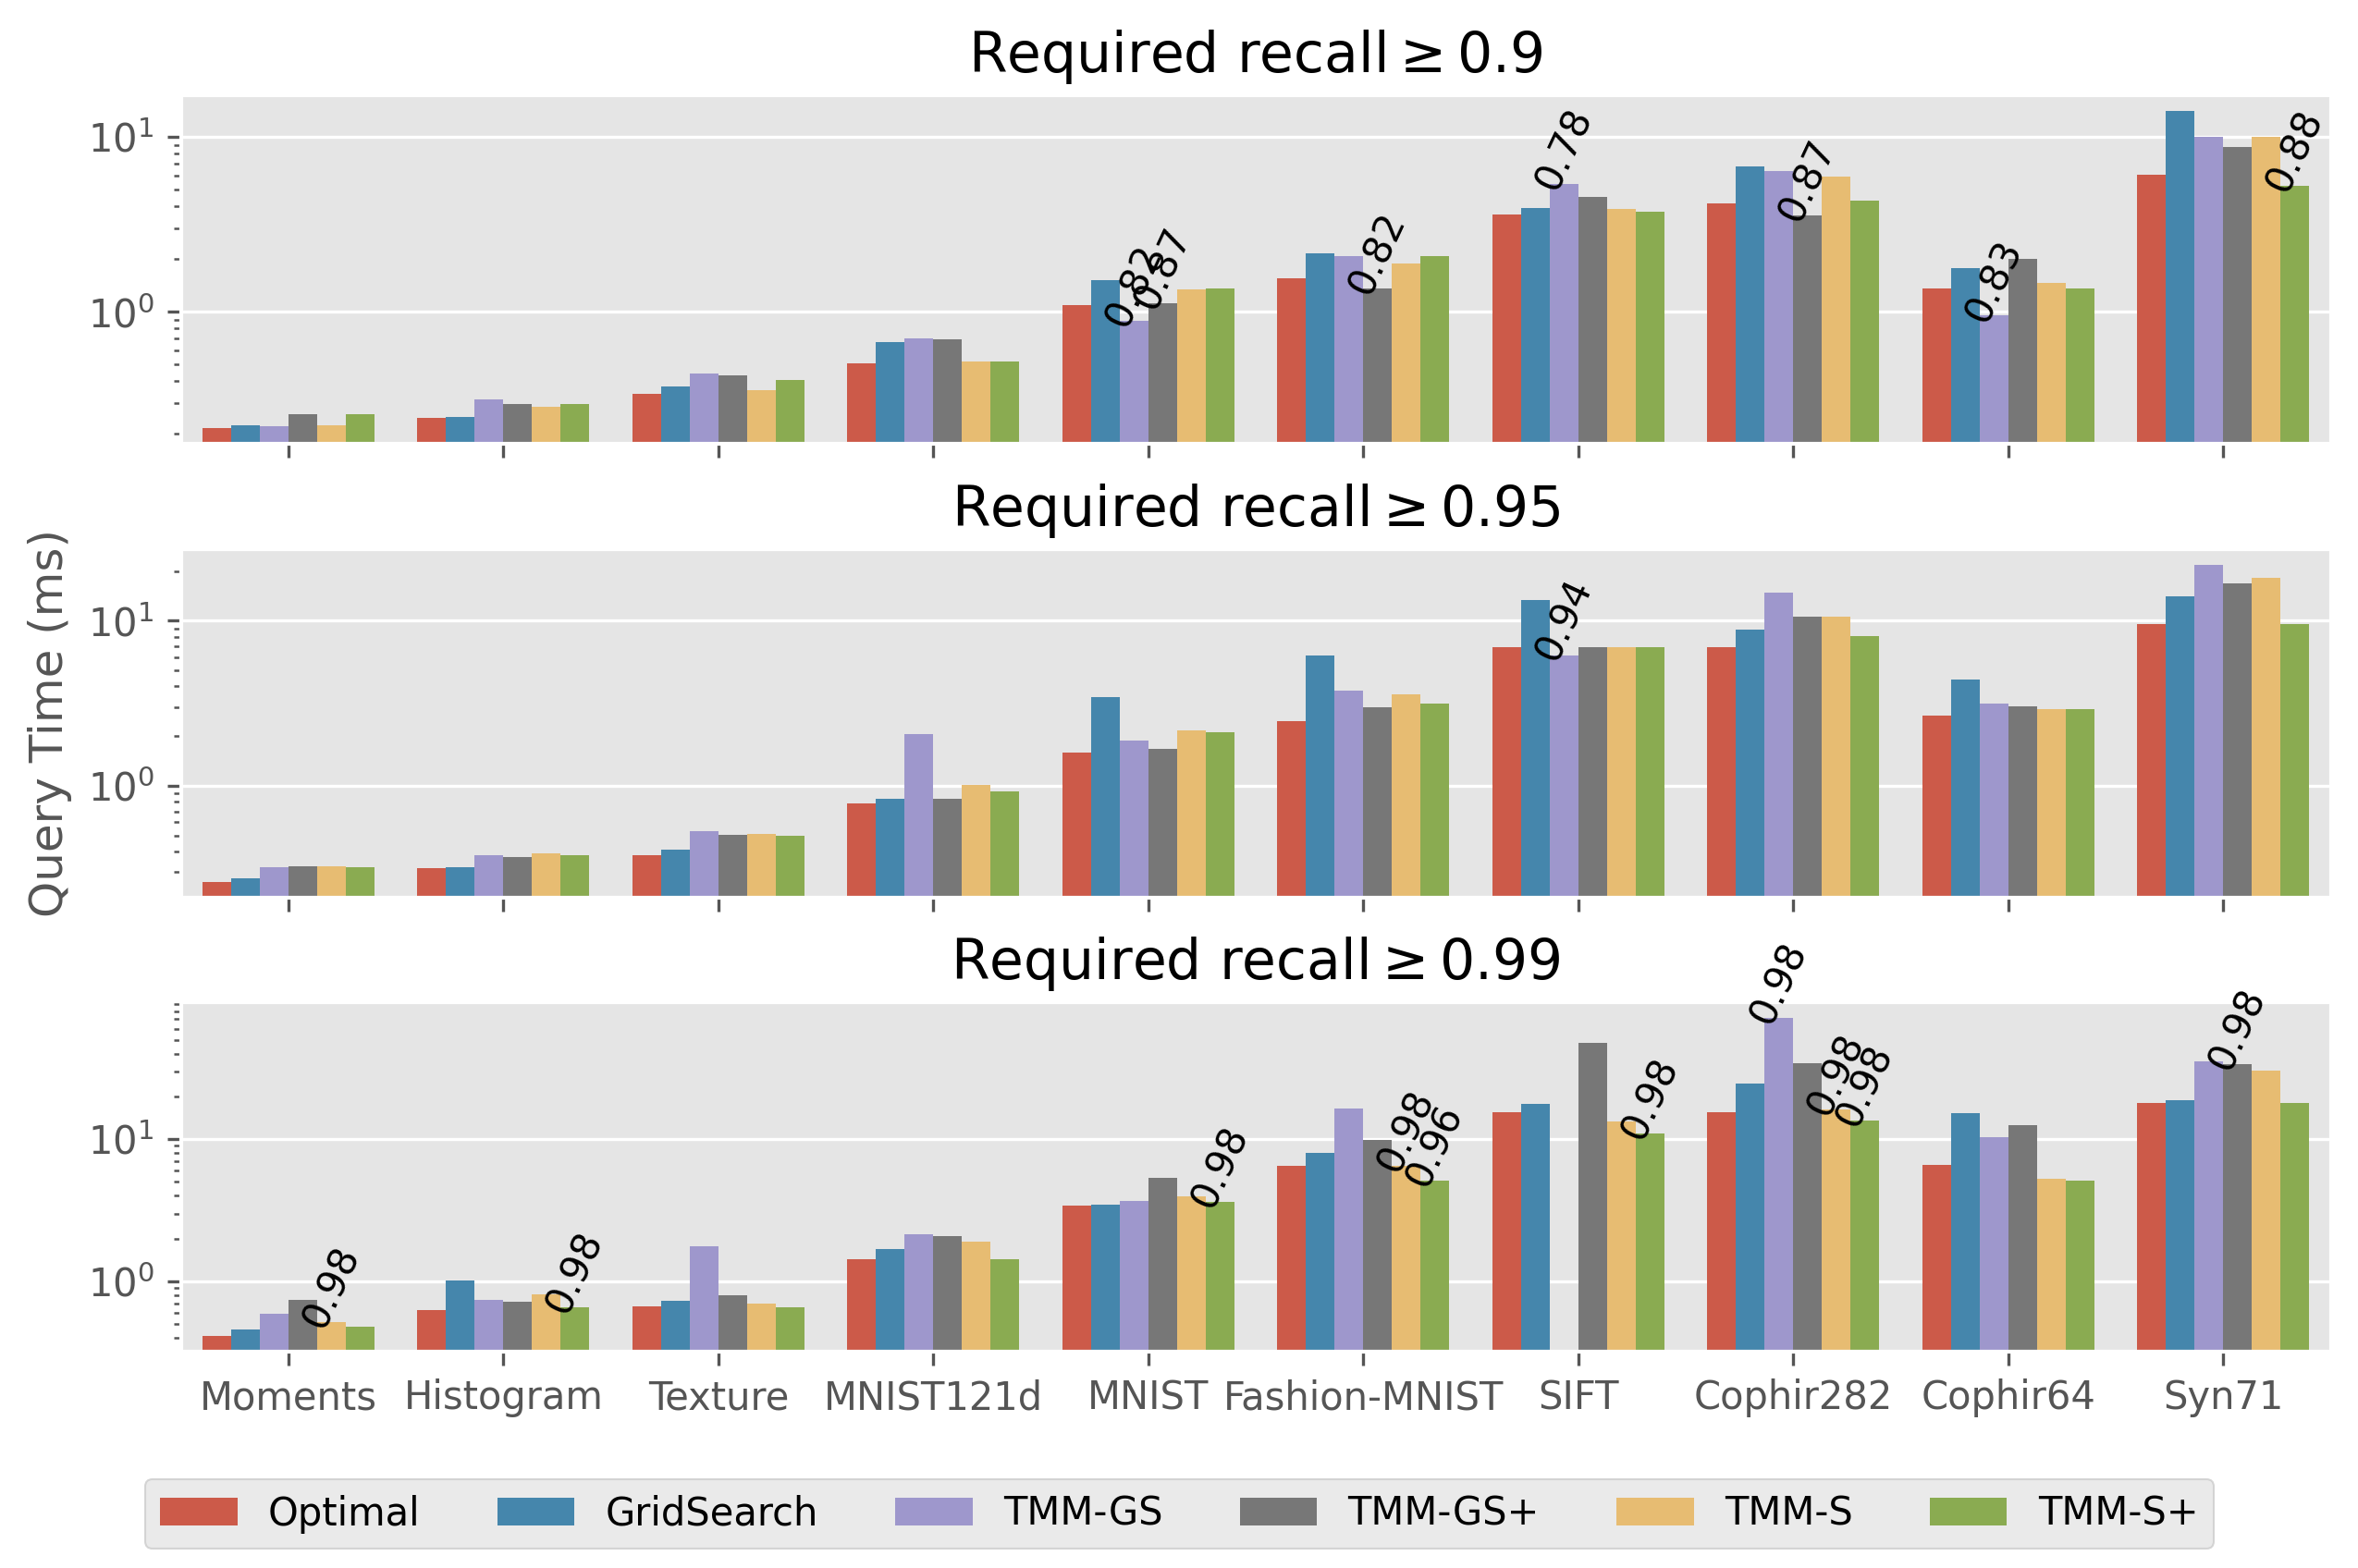

In [31]:
optimizing = 'qt'
y = 'Query Time (ms)'
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal/results'
hue_order = ['Optimal', 'GridSearch', 'TMM-GS', 'TMM-GS+', 'TMM-S', 'TMM-S+']

fig, axes = plt.subplots(3,1, figsize=(10, 6), dpi=300, sharex=True)
axes = axes.reshape(-1)

for ax, required_recall in zip(axes, [0.9, 0.95, 0.99]):
    df = final_recommendations[(final_recommendations.optmizing == optimizing) & (final_recommendations.required_recall == required_recall)].copy()
    g = sns.barplot(x='Dataset', y=y, hue='Approach', hue_order=hue_order, data=df, ax=ax)
    test = df.copy()
    test.set_index('Approach', inplace=True)
    drop =  list(set(hue_order) - set(test.index.unique()))
    o = [h for h in hue_order if h not in drop]
    test = test.loc[o, :].reset_index()
    for ix, p in enumerate(g.patches):
        if ix == len(test):
            break
        tmp = test.loc[ix, :]
        if tmp.Dataset != 'Dataset' and tmp.Recall < tmp.required_recall:
            g.annotate(
                # format(p.get_height(), '.1f'),
                tmp.Recall,
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                size=10,
                rotation=65,
                textcoords = 'offset points'
                ) 
    if y != 'NN':
        ax.set_yscale('log')
    if required_recall != 0.95:
        ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(fr'Required recall$\geq{required_recall}$') # 
    ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6)
plt.subplots_adjust(hspace=0.3)
# plt.suptitle(y)
# plt.savefig(f'{path}/tuned_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.savefig(f'/home/seidi/Desktop/tuned_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

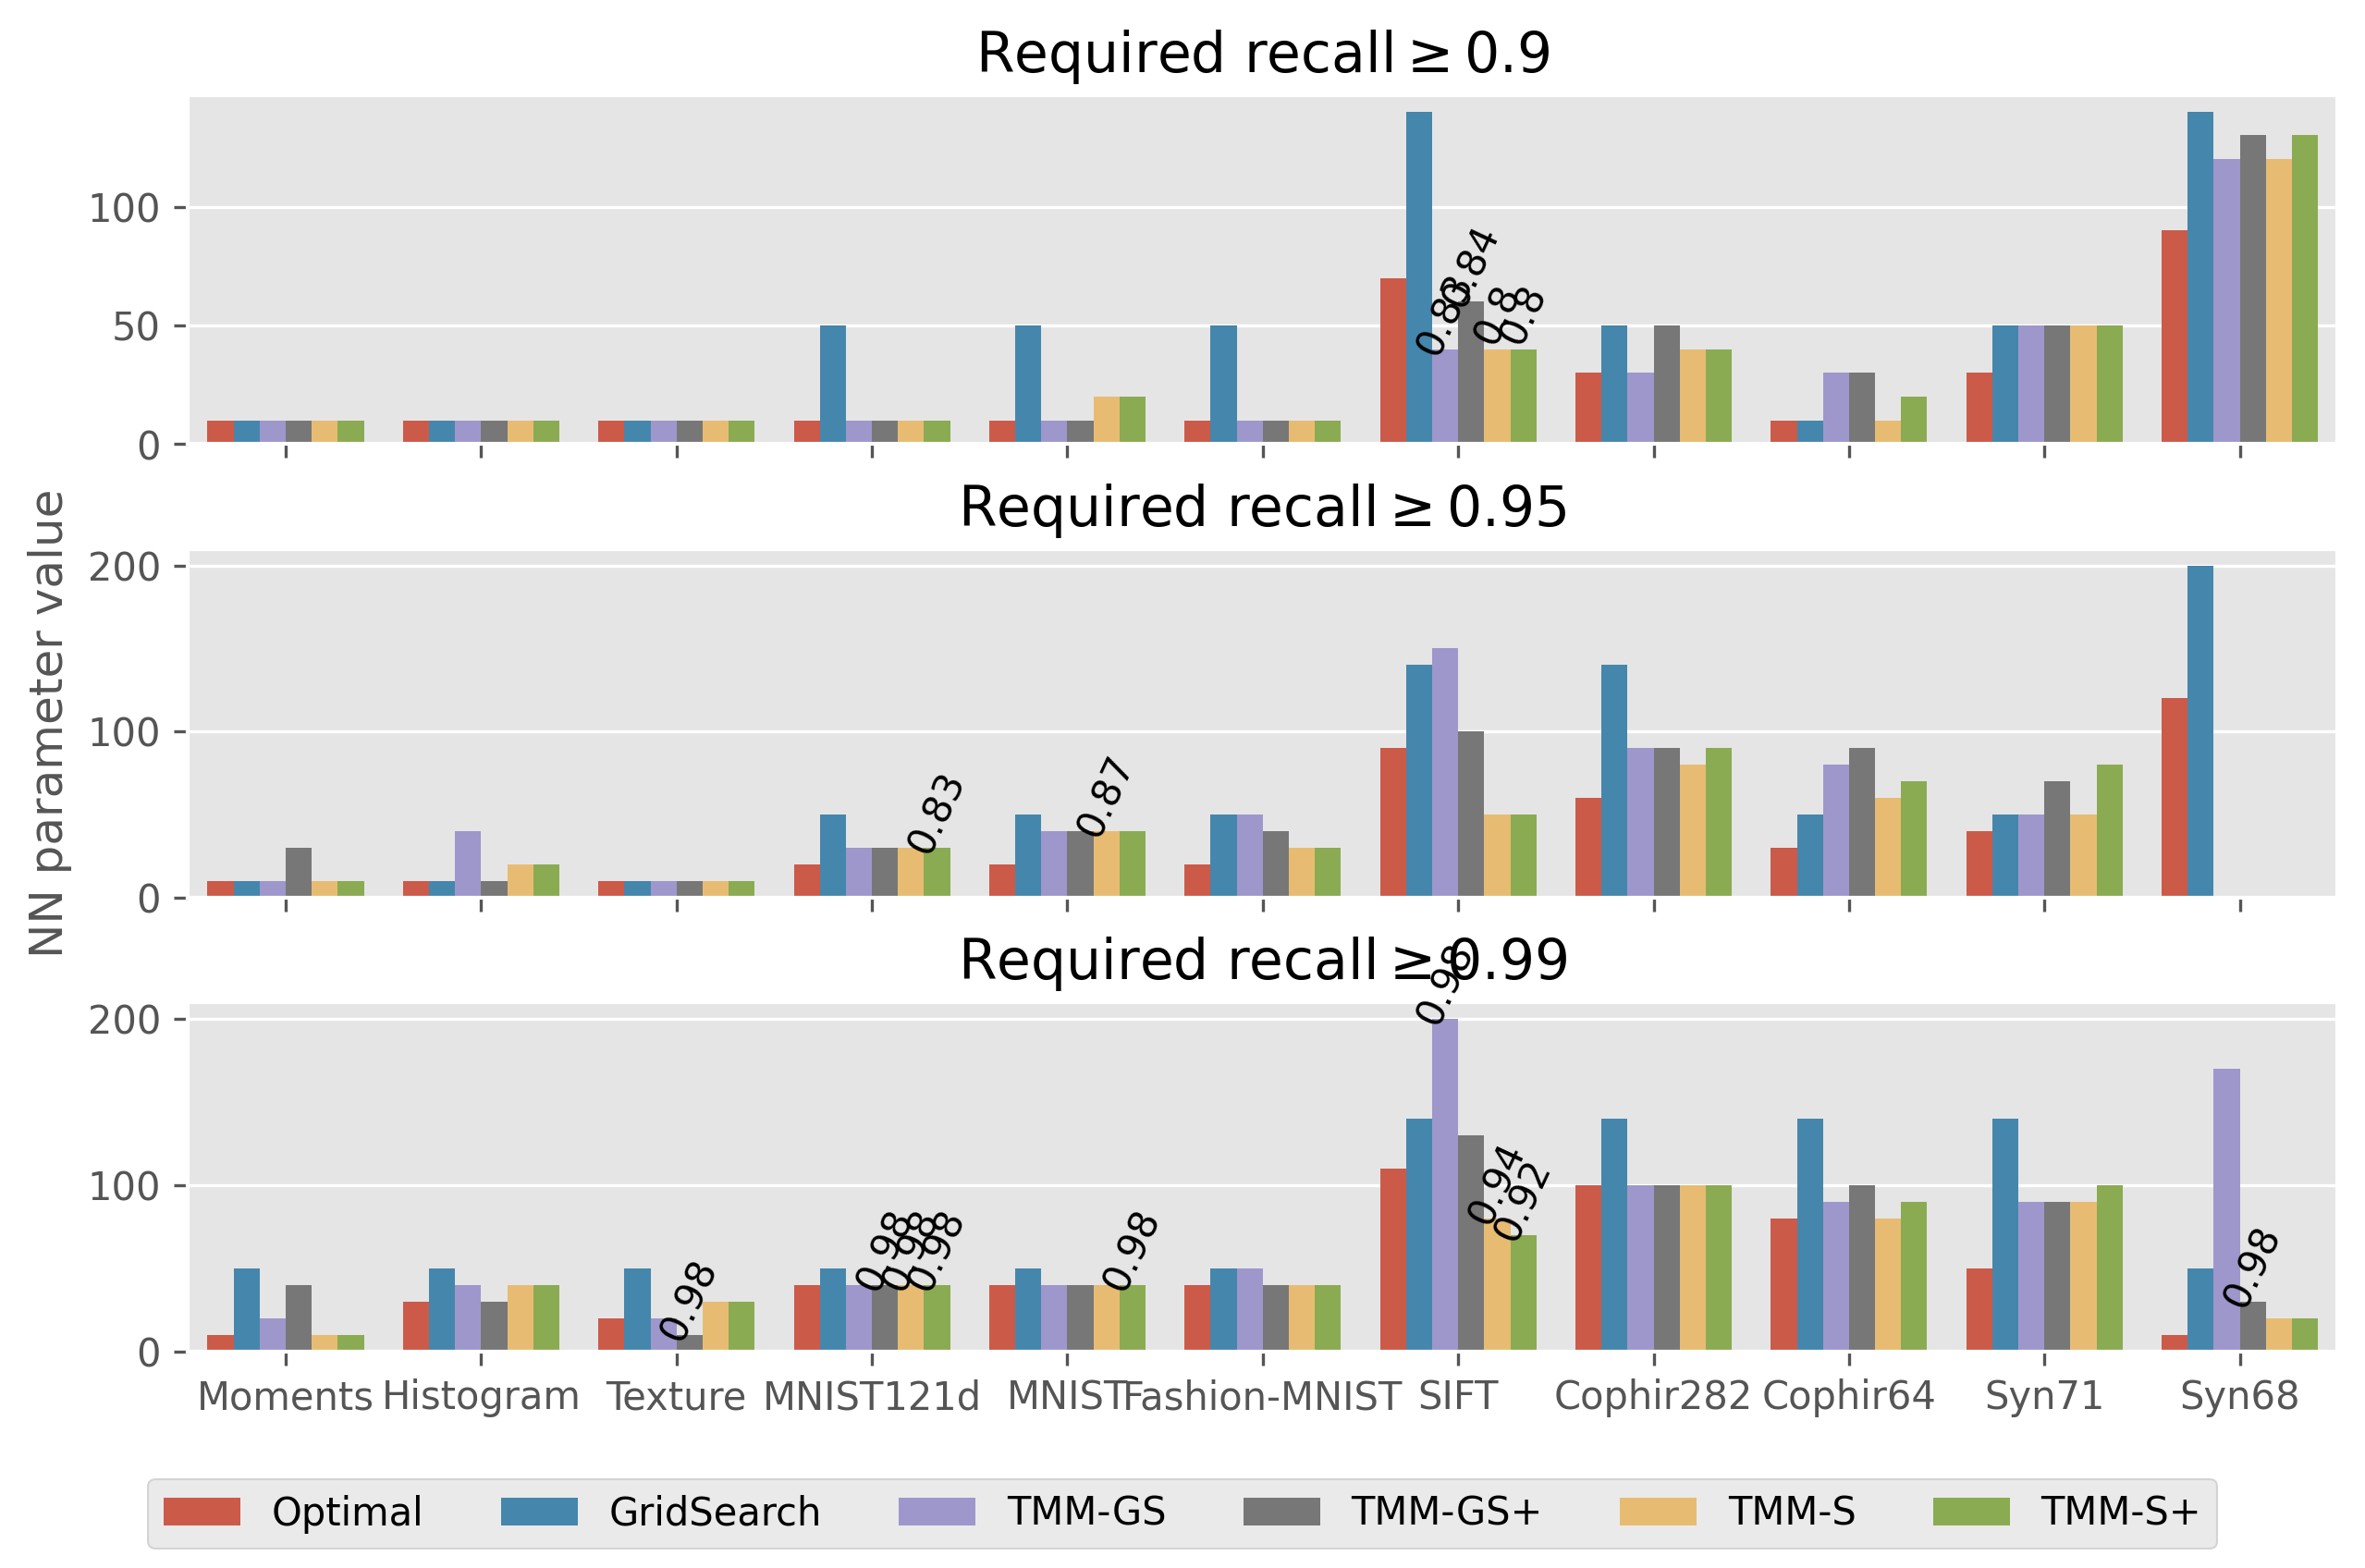

In [20]:
optimizing = 'nn'
y = 'NN'
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal/results'
hue_order = ['Optimal', 'GridSearch', 'TMM-GS', 'TMM-GS+', 'TMM-S', 'TMM-S+']

fig, axes = plt.subplots(3,1, figsize=(10, 6), dpi=300, sharex=True)
axes = axes.reshape(-1)

for ax, required_recall in zip(axes, [0.9, 0.95, 0.99]):
    df = final_recommendations[(final_recommendations.optmizing == optimizing) & (final_recommendations.required_recall == required_recall)].copy()
    g = sns.barplot(x='Dataset', y=y, hue='Approach', hue_order=hue_order, data=df, ax=ax)
    test = df.copy()
    test.set_index('Approach', inplace=True)
    drop =  list(set(hue_order) - set(test.index.unique()))
    o = [h for h in hue_order if h not in drop]
    test = test.loc[o, :].reset_index()
    for ix, p in enumerate(g.patches):
        if ix == len(test):
            break
        tmp = test.loc[ix, :]
        if tmp.Dataset != 'Dataset' and tmp.Recall < tmp.required_recall:
            g.annotate(
                # format(p.get_height(), '.1f'),
                tmp.Recall,
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                size=10,
                rotation=65,
                textcoords = 'offset points'
                ) 
    if y != 'NN':
        ax.set_yscale('log')
    if required_recall != 0.95:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('NN parameter value')
    ax.set_xlabel('')
    ax.set_title(fr'Required recall$\geq{required_recall}$') # 
    ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6)
plt.subplots_adjust(hspace=0.3)
# plt.suptitle(y)
# plt.savefig(f'{path}/tuned_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

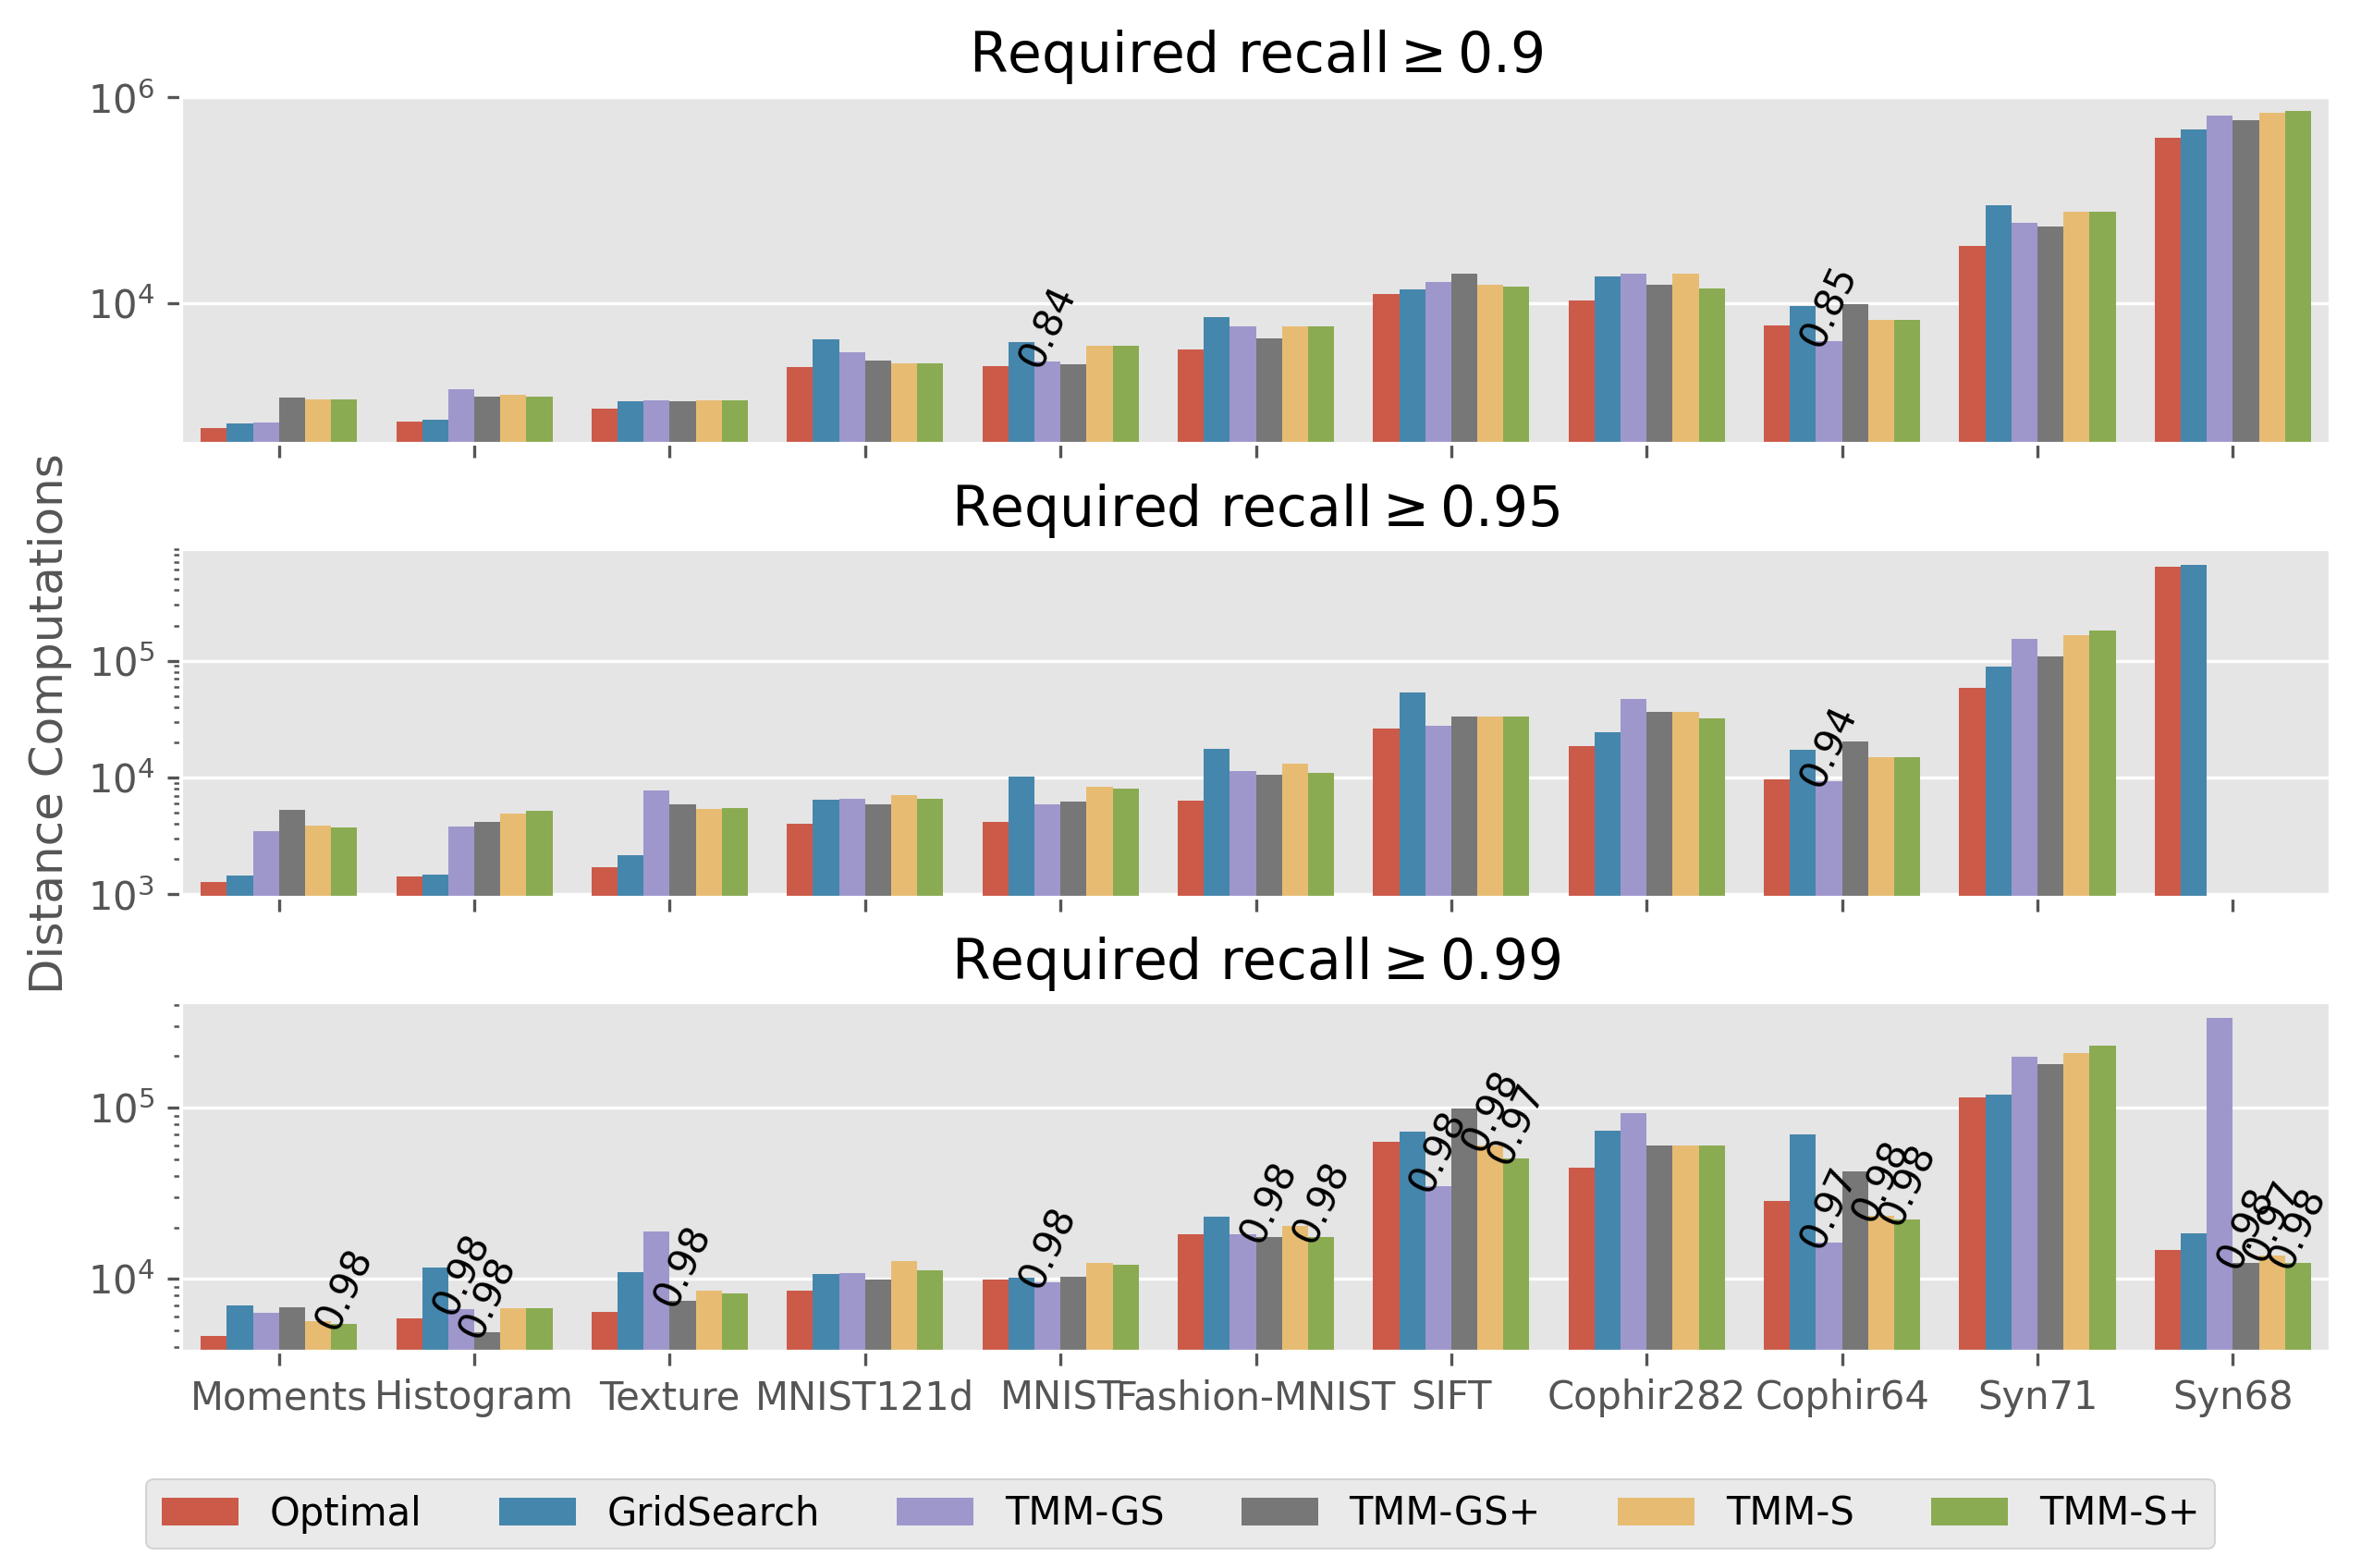

In [21]:
optimizing = 'dt'
y = 'Distance Computations'
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal/results'
hue_order = ['Optimal', 'GridSearch', 'TMM-GS', 'TMM-GS+', 'TMM-S', 'TMM-S+']

fig, axes = plt.subplots(3,1, figsize=(10, 6), dpi=300, sharex=True)
axes = axes.reshape(-1)

for ax, required_recall in zip(axes, [0.9, 0.95, 0.99]):
    df = final_recommendations[(final_recommendations.optmizing == optimizing) & (final_recommendations.required_recall == required_recall)].copy()
    g = sns.barplot(x='Dataset', y=y, hue='Approach', hue_order=hue_order, data=df, ax=ax)
    test = df.copy()
    test.set_index('Approach', inplace=True)
    drop =  list(set(hue_order) - set(test.index.unique()))
    o = [h for h in hue_order if h not in drop]
    test = test.loc[o, :].reset_index()
    for ix, p in enumerate(g.patches):
        if ix == len(test):
            break
        tmp = test.loc[ix, :]
        if tmp.Dataset != 'Dataset' and tmp.Recall < tmp.required_recall:
            g.annotate(
                # format(p.get_height(), '.1f'),
                tmp.Recall,
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                size=10,
                rotation=65,
                textcoords = 'offset points'
                ) 
    if y != 'NN':
        ax.set_yscale('log')
    if required_recall != 0.95:
        ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(fr'Required recall$\geq{required_recall}$') # 
    ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6)
plt.subplots_adjust(hspace=0.3)
# plt.suptitle(y)
# plt.savefig(f'{path}/tuned_recommendations_{optimizing}.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

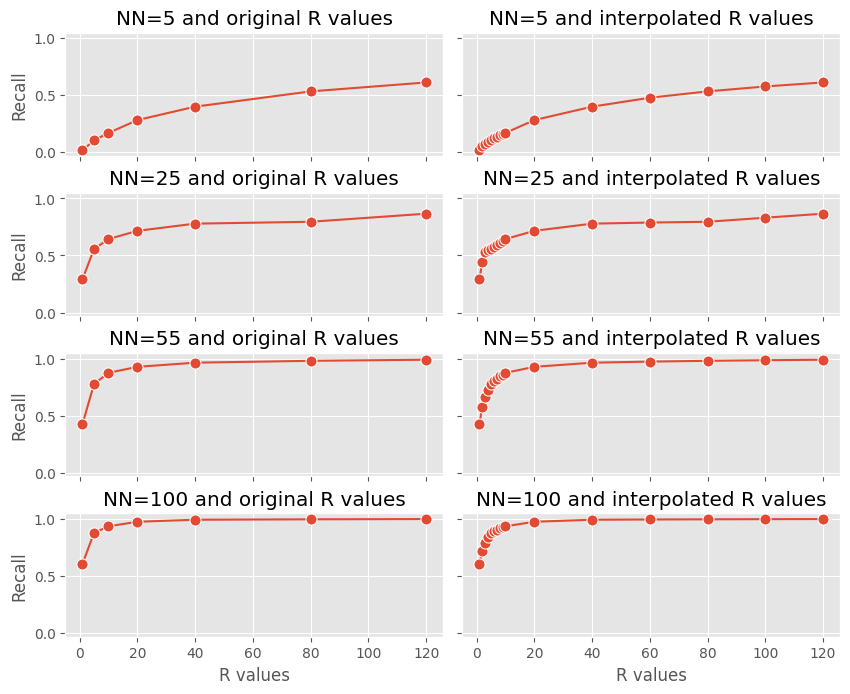

In [77]:
path = '/home/seidi/Repositories/Mestrado_quali/figures/journal'

base = 'sift_999900'
graph_type = 0
k = 30

rr_original = [1, 5, 10, 20, 40, 80, 120, 240]
nn_original = [5, 25, 55, 100]

plt_cfg = {
    'x': 'R values',
    'y': 'Recall',
    'marker': 'o',
    'markersize': 8
}

fig, axes = plt.subplots(4, 2, figsize=(10,8), sharey=True, sharex=True, dpi=100)
axes = iter(axes.reshape(-1))
plt.subplots_adjust(wspace=0.05)

for NN in nn_original:
    tmp = mb[
        (mb.IndexParams == NN) &
        (mb.graph_type == 0) &
        (mb.index == base)
    ].copy()
    tmp = tmp.rename(columns={'QueryTimeParams': 'R values'})
    ax = next(axes)
    ax.set_title(f'NN={NN} and original R values')
    sns.lineplot(data=tmp[tmp['R values'].isin(rr_original)], ax=ax, **plt_cfg)

    tmp = mb[
        (mb.IndexParams == NN) &
        (mb.graph_type == 0) &
        (mb.index == base)
    ].copy()
    tmp = tmp.rename(columns={'QueryTimeParams': 'R values'})
    ax = next(axes)
    ax.set_title(f'NN={NN} and interpolated R values')
    sns.lineplot(data=tmp, ax=ax, **plt_cfg)

    NN += 10

plt.subplots_adjust(hspace=.3)
plt.savefig(f'{path}/interpolation.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

In [91]:
os.path.join(path, p)

'/home/seidi/Repositories/prox_graph_auto_config/src/notebooks/2020.11.03/results/scores/interpolation_validation.pdf'

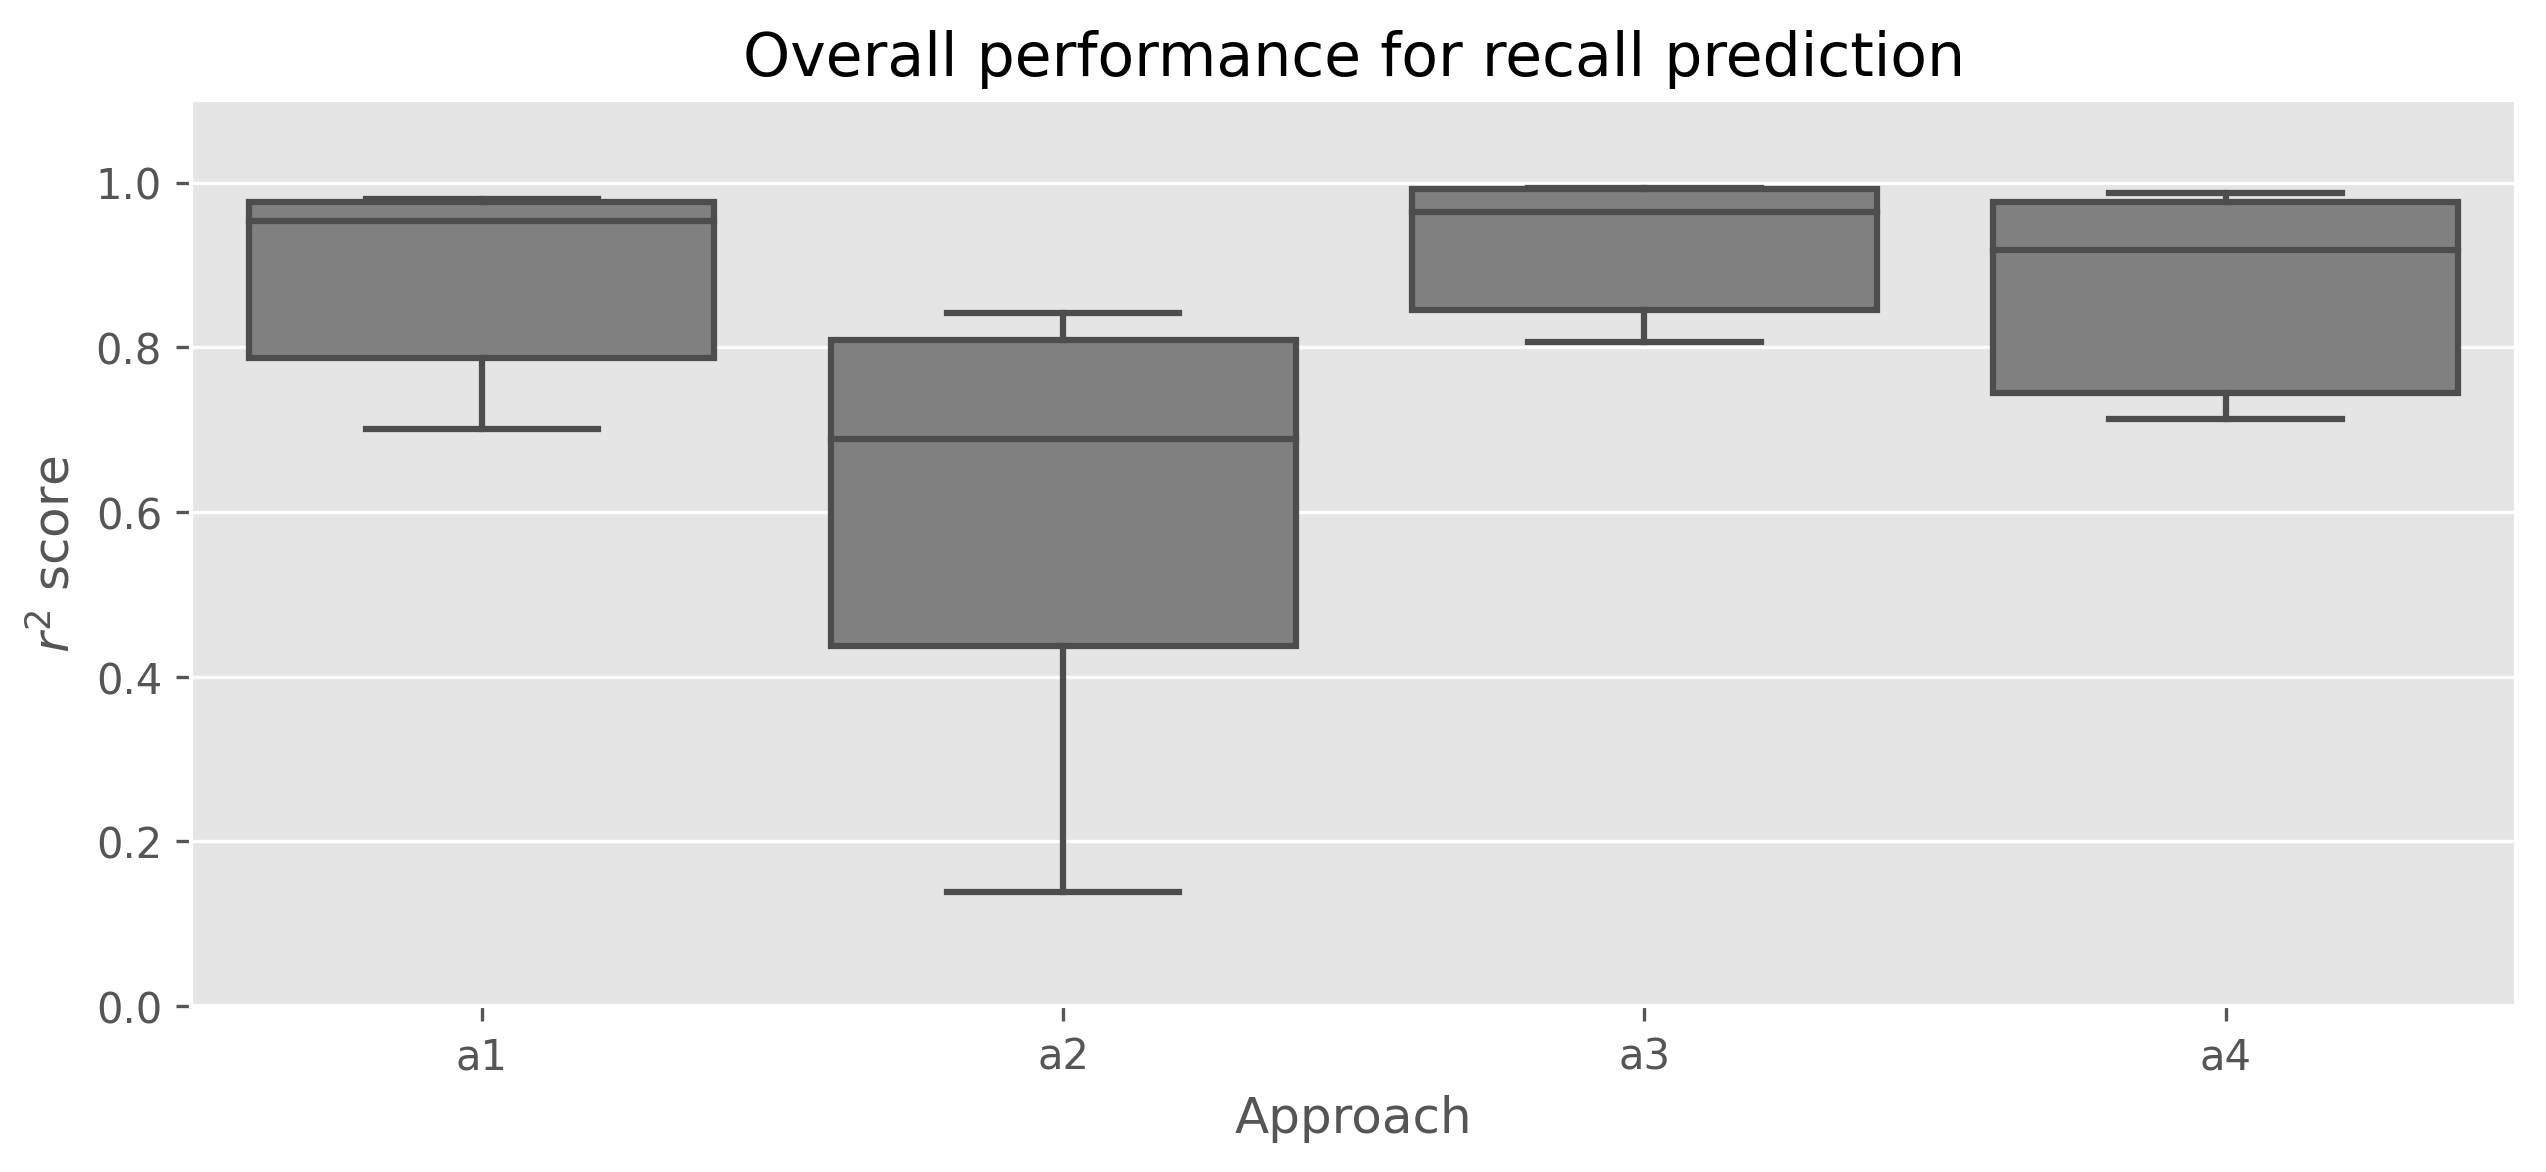

In [4]:
path = '/home/seidi/Repositories/prox_graph_auto_config/src/notebooks/2020.11.03/results/scores'
res = pd.DataFrame()
for p in os.listdir(path):
    df = pd.read_csv(os.path.join(path, p))
    df.base = df.base.apply(lambda x: x.split('_')[0])
    if 'mse' in df.columns:
        df.mse = df.mse ** (1/2)
        df = df.rename(columns={'mse': 'rmse'})

    df = df[['base', 'target', 'r2', 'rmse']]
    df['method'] = p.split('.')[0]
    res = pd.concat([res, df])

res.reset_index(inplace=True, drop=True)
res.method = res.method.map({
    'similarity_common_params': 'sim_cp',
    'similarity_interpolations': 'sim_int',
    'similarity': 'sim',
    'gmm_scores_interpolated_v4': 'gmm_v2',
    'similarity_interpolations_v2': 'sim_int_v2',
    'weighted_similarity': 'sim_weighted',
    'k=1': 'k=1',
    'gmm_scores_original':          'a1',
    'gmm_scores_interpolated_v3':   'a2',
    'gmm_scores_interpolated_v2':   'a3',
    'gmm_scores_interpolated_v1':   'a4',
    })

PALETTE = {
    "sim": "darkblue",
    "sim_cp": "lightsteelblue",
    "sim_int": "aqua",
    "gmm_v2": "yellow",
    "sim_int_v2": "pink",
    'sim_weighted': 'black',
    'k=1': 'blue',
    "v1": "green",
    "v2": "orange",
    "v3": "tomato",
    "v4": "red",
}

HUE_ORDER = ['a1', 'a2', 'a3', 'a4']
res[(res.target=='Recall') & (res.method=='a1')]

fig, ax = plt.subplots(1,1, figsize=(10, 4), dpi=300)
target = 'Recall'
tmp = res[(res.method.isin(HUE_ORDER)) & (res.target == target)].copy()

tmp = tmp.set_index('method').loc[HUE_ORDER].reset_index()
sns.boxplot(x='method', y='r2', data=tmp, color='gray')
ax.set_title('Overall performance for recall prediction')
ax.set_ylabel(r'$r^2$ score')
ax.set_xlabel('Approach')
ax.set_ylim(0, 1.1)
plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/interpolation_validation.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

All real datastes plus one sift subset (500k)


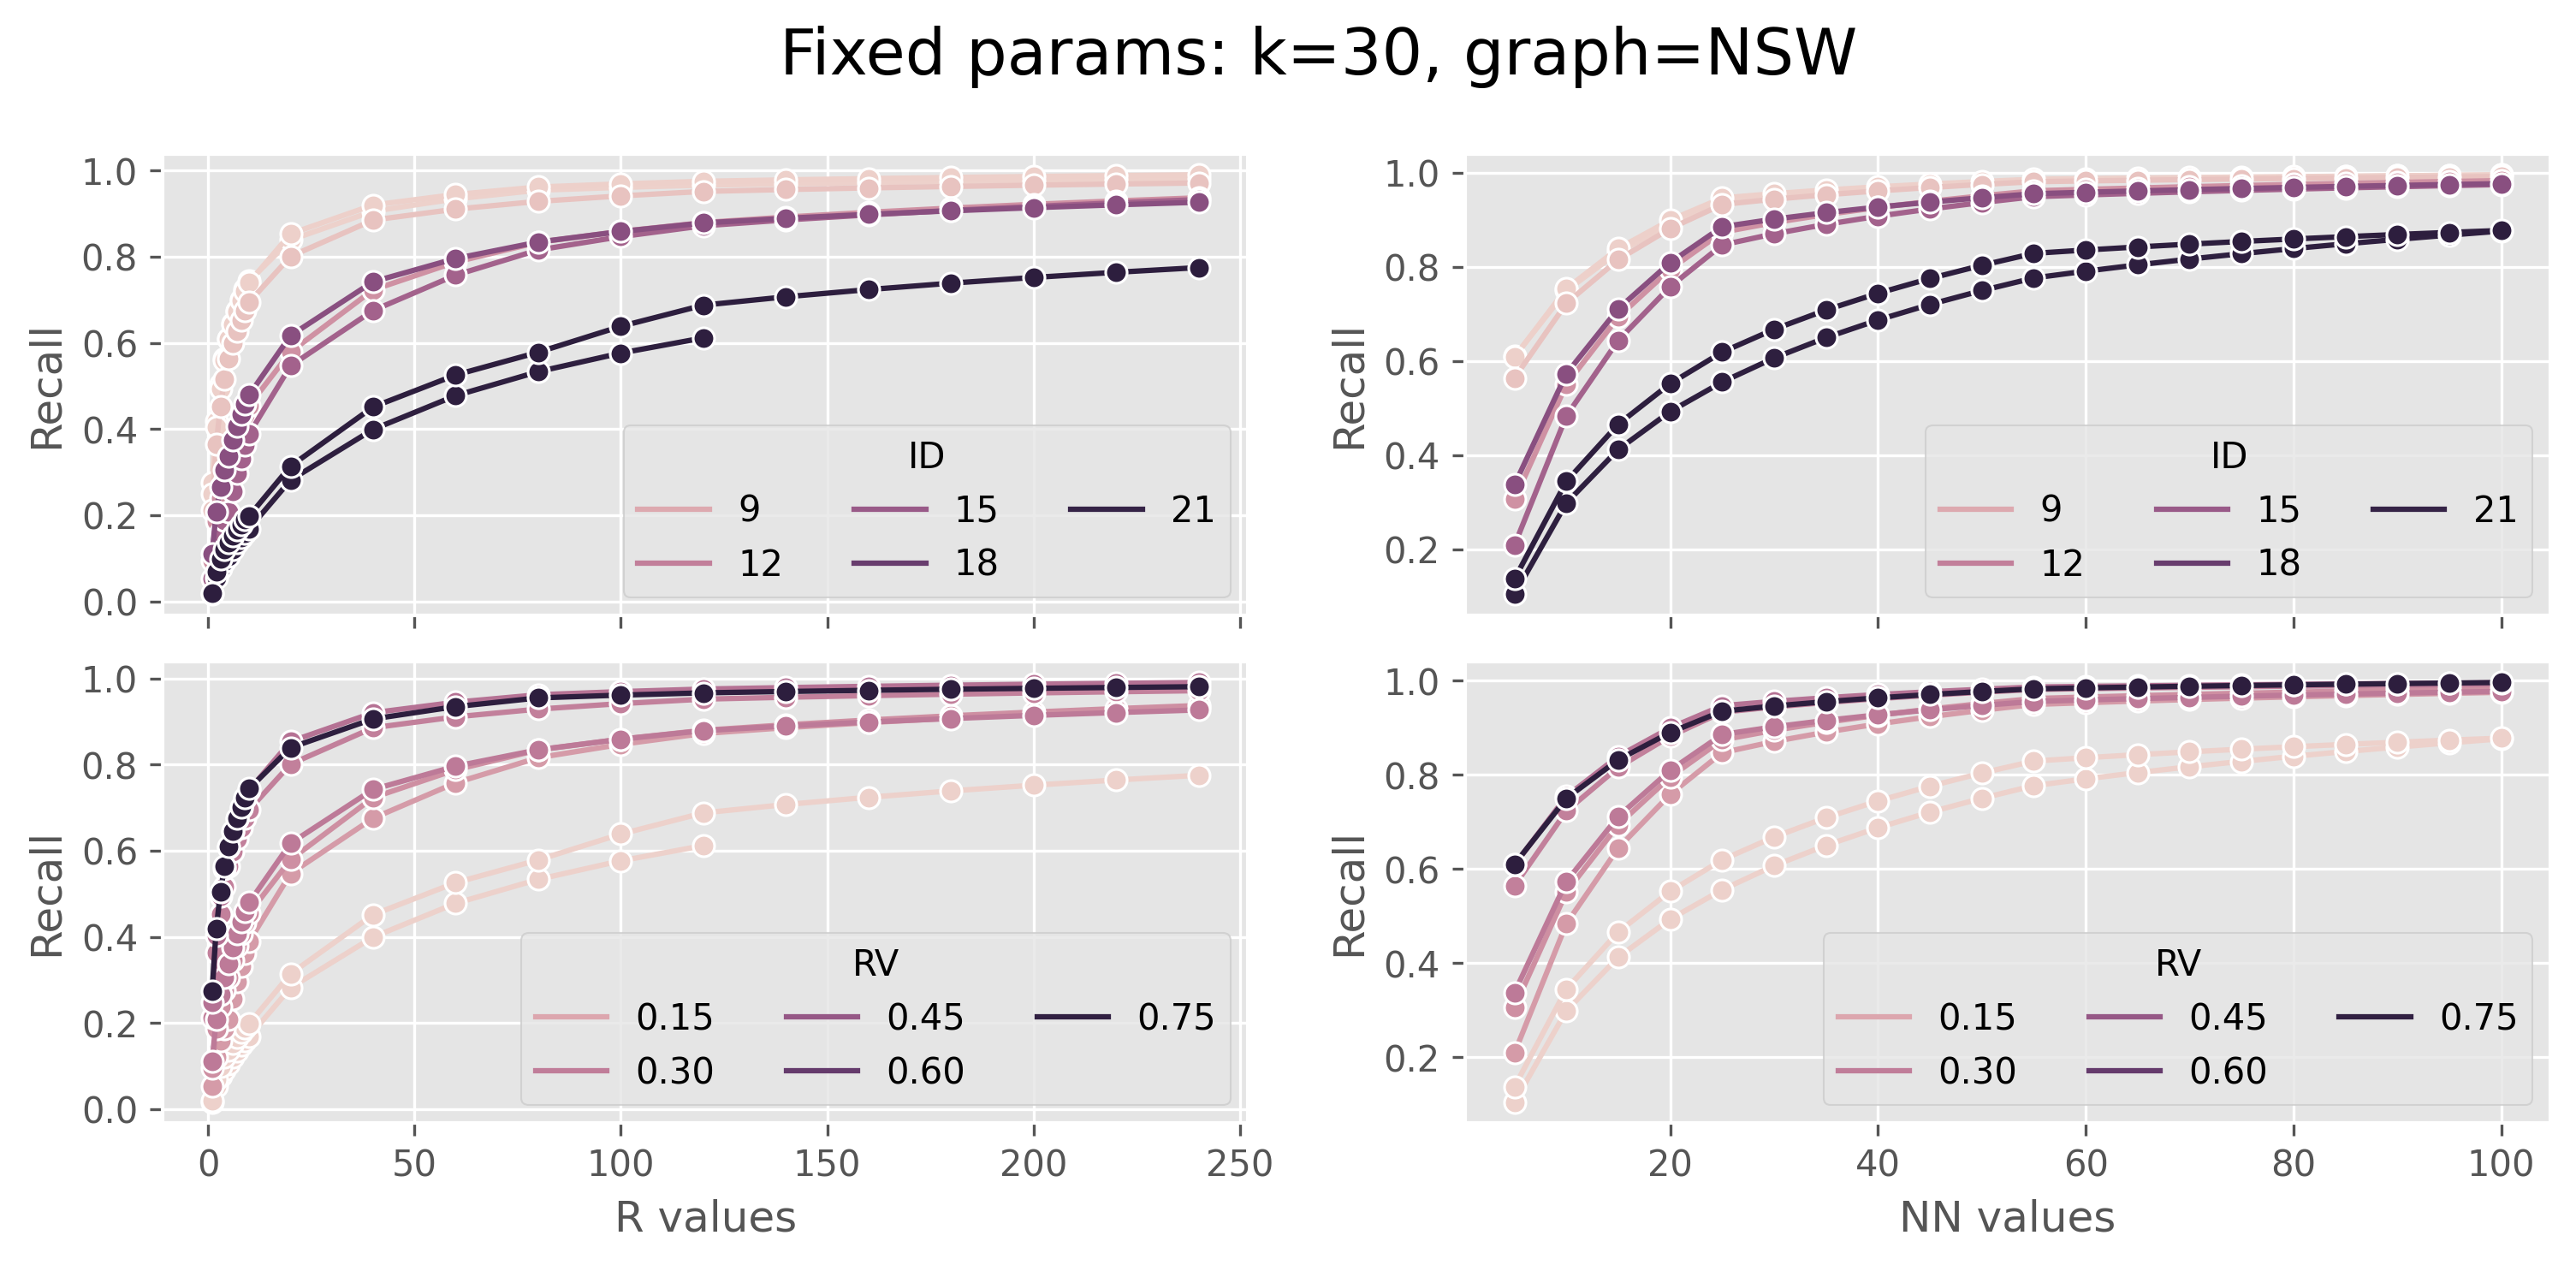

In [22]:
nn = 5
r = 5
k = 30
graph_type = 0
tmp = mb[
    (mb.nr_inst.isin(np.log([999900, 67940, 69900, 500000]))) &
    # (mb.IndexParams == nn) & 
    # (mb.k_searching == k) &
    (~mb.index.str.startswith('base')) &
    (mb.graph_type == graph_type) 
    ].copy()

tmp = tmp.rename(columns={'lid_mean': 'ID', 'rv': 'RV', 'QueryTimeParams': 'R values', 'IndexParams': 'NN values'})

hue = ['ID', 'RV']
x_axis = ['R values', 'NN values']
from itertools import product
prods = product(hue, x_axis)

fig, ax = plt.subplots(2,2,figsize=(12,5), dpi=300, sharex='col')
axes = iter(ax.reshape(-1))

for h, x in prods:
    ax = next(axes)
    if x.startswith('NN'):
        sns.lineplot(x=x, y='Recall', hue=h, data=tmp[tmp['R values'] == r], marker='o', ax=ax)
    else:
        sns.lineplot(x=x, y='Recall', hue=h, data=tmp[tmp['NN values'] == nn], marker='o', ax=ax)
    ax.legend(title=h, ncol=3)
    

# sns.lineplot(x='R values', y='Recall', hue='RV', data=tmp, marker='o', ax=ax[1])

plt.suptitle(f'Fixed params: k={k}, graph=NSW', fontsize=18)
# ax[0].set_title('Intrinsic Dimensionality')
# ax[1].set_title('Relative Variance')

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=3)
plt.subplots_adjust(hspace=0.1)

print('All real datastes plus one sift subset (500k)')
plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/complexity_metafeatures.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

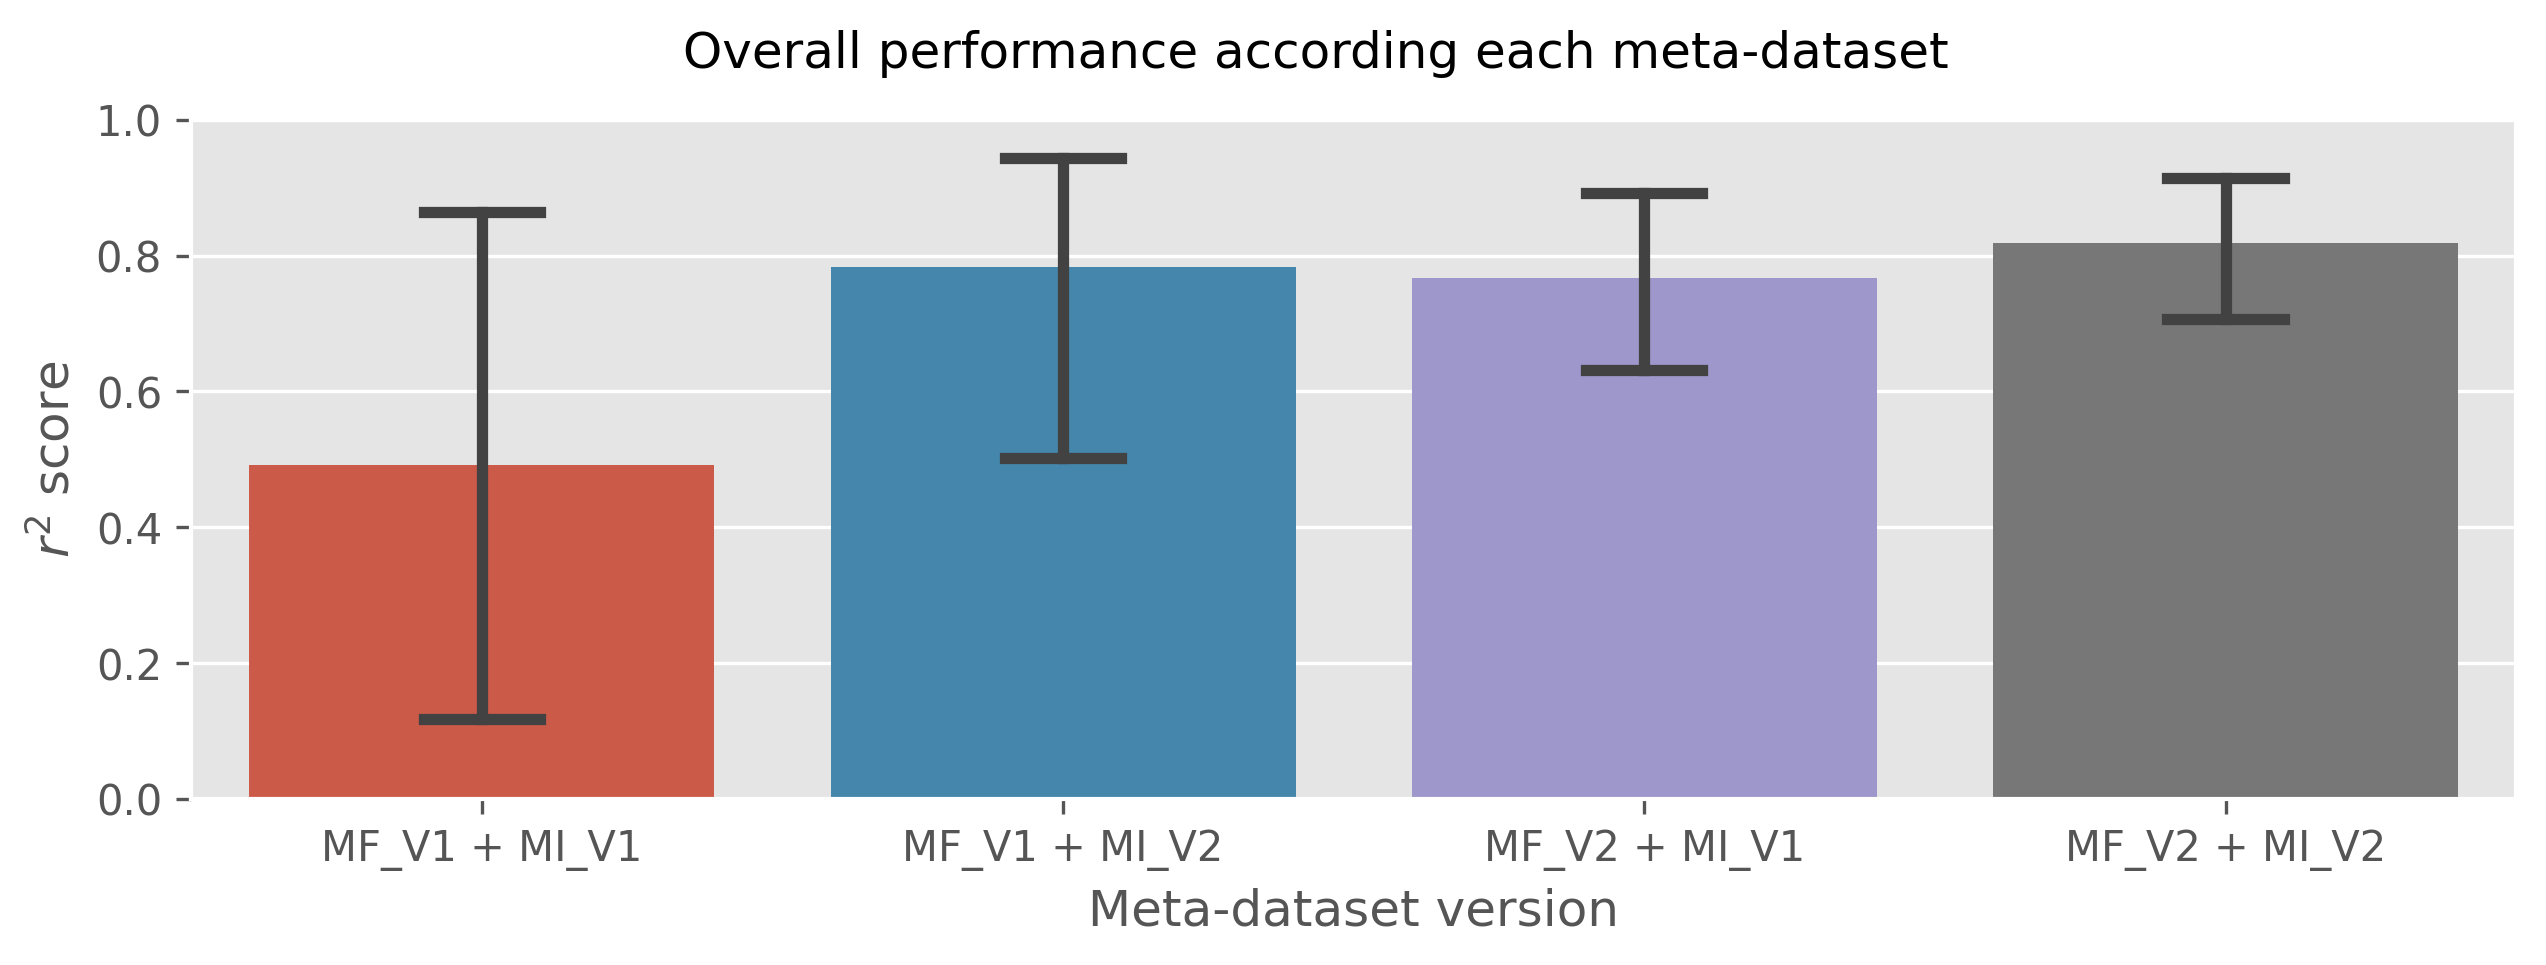

In [119]:
all_scores = pd.read_csv('src/notebooks/overview/results/old_new_evaluation.csv')
approaches = {
    'old_mfs+old_bases': 'MF_V1 + MI_V1',
    'old_mfs+new_bases': 'MF_V1 + MI_V2',
    'new_mfs+old_bases': 'MF_V2 + MI_V1',
    'new_mfs+new_bases': 'MF_V2 + MI_V2',
}
all_scores.method = all_scores.method.map(lambda x: approaches.get(x, x))
plt.figure(figsize=(10,3), dpi=300)
plt.ylim(0, 1)
sns.barplot(x='method', y='r2', data=all_scores, capsize=.2)
plt.ylabel(r'$r^2$ score')
plt.xlabel('Meta-dataset version')
plt.suptitle('Overall performance according each meta-dataset')
plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/metadataset_enhancement.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

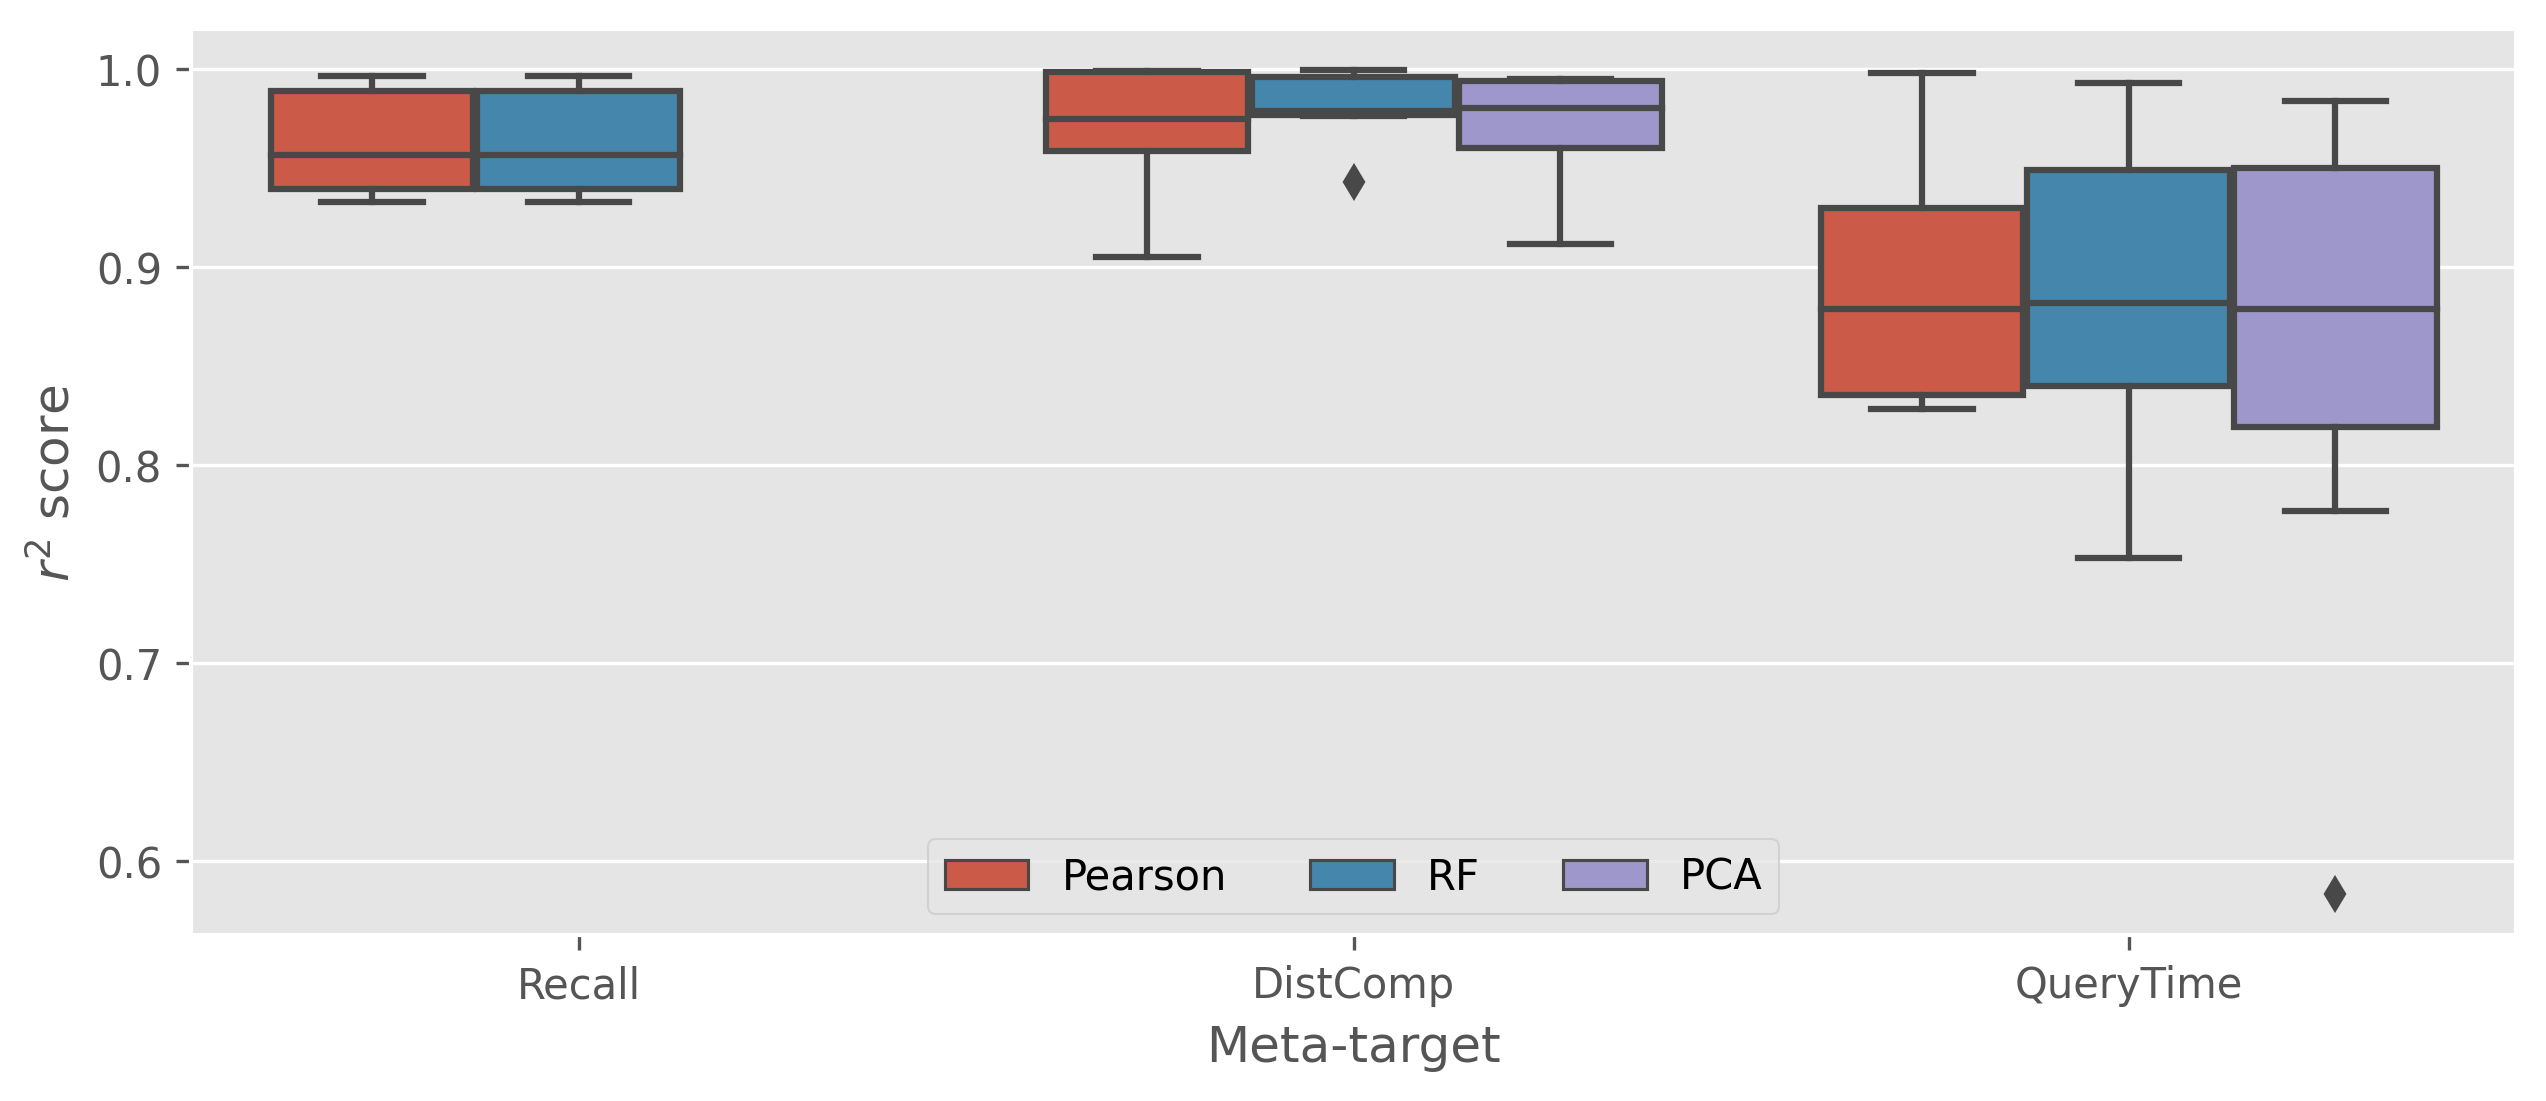

In [38]:
scores_path = 'data/results/clustering/clustering_scores.csv'
scores = pd.read_csv(scores_path)
scores = scores[scores.target != 'IndexTime']
# drop_ix = scores[(scores.target == 'Recall') & (scores.feature_selection_method == 'pca')].index.values
# scores.drop(drop_ix, inplace=True, axis=0)
scores.r2 = scores.r2.apply(lambda x: 0 if x <= 0 else x)
scores.sort_values(by='r2').groupby(['target', 'feature_selection_method']).r2.describe()
scores.feature_selection_method = scores.feature_selection_method.apply(lambda x: 'Pearson' if x == 'pearson' else x)
scores.feature_selection_method = scores.feature_selection_method.apply(lambda x: 'RF' if x == 'rf' else x)
scores.feature_selection_method = scores.feature_selection_method.apply(lambda x: 'PCA' if x == 'pca' else x)
plt.figure(dpi=300, figsize=(10,4))
sns.boxplot(x='target', y='r2', hue='feature_selection_method', data=scores)

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=3)
plt.ylabel(r'$r^2$ score')
plt.xlabel('Meta-target')
plt.legend(loc='lower center', ncol=3)

plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/fs_methods.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

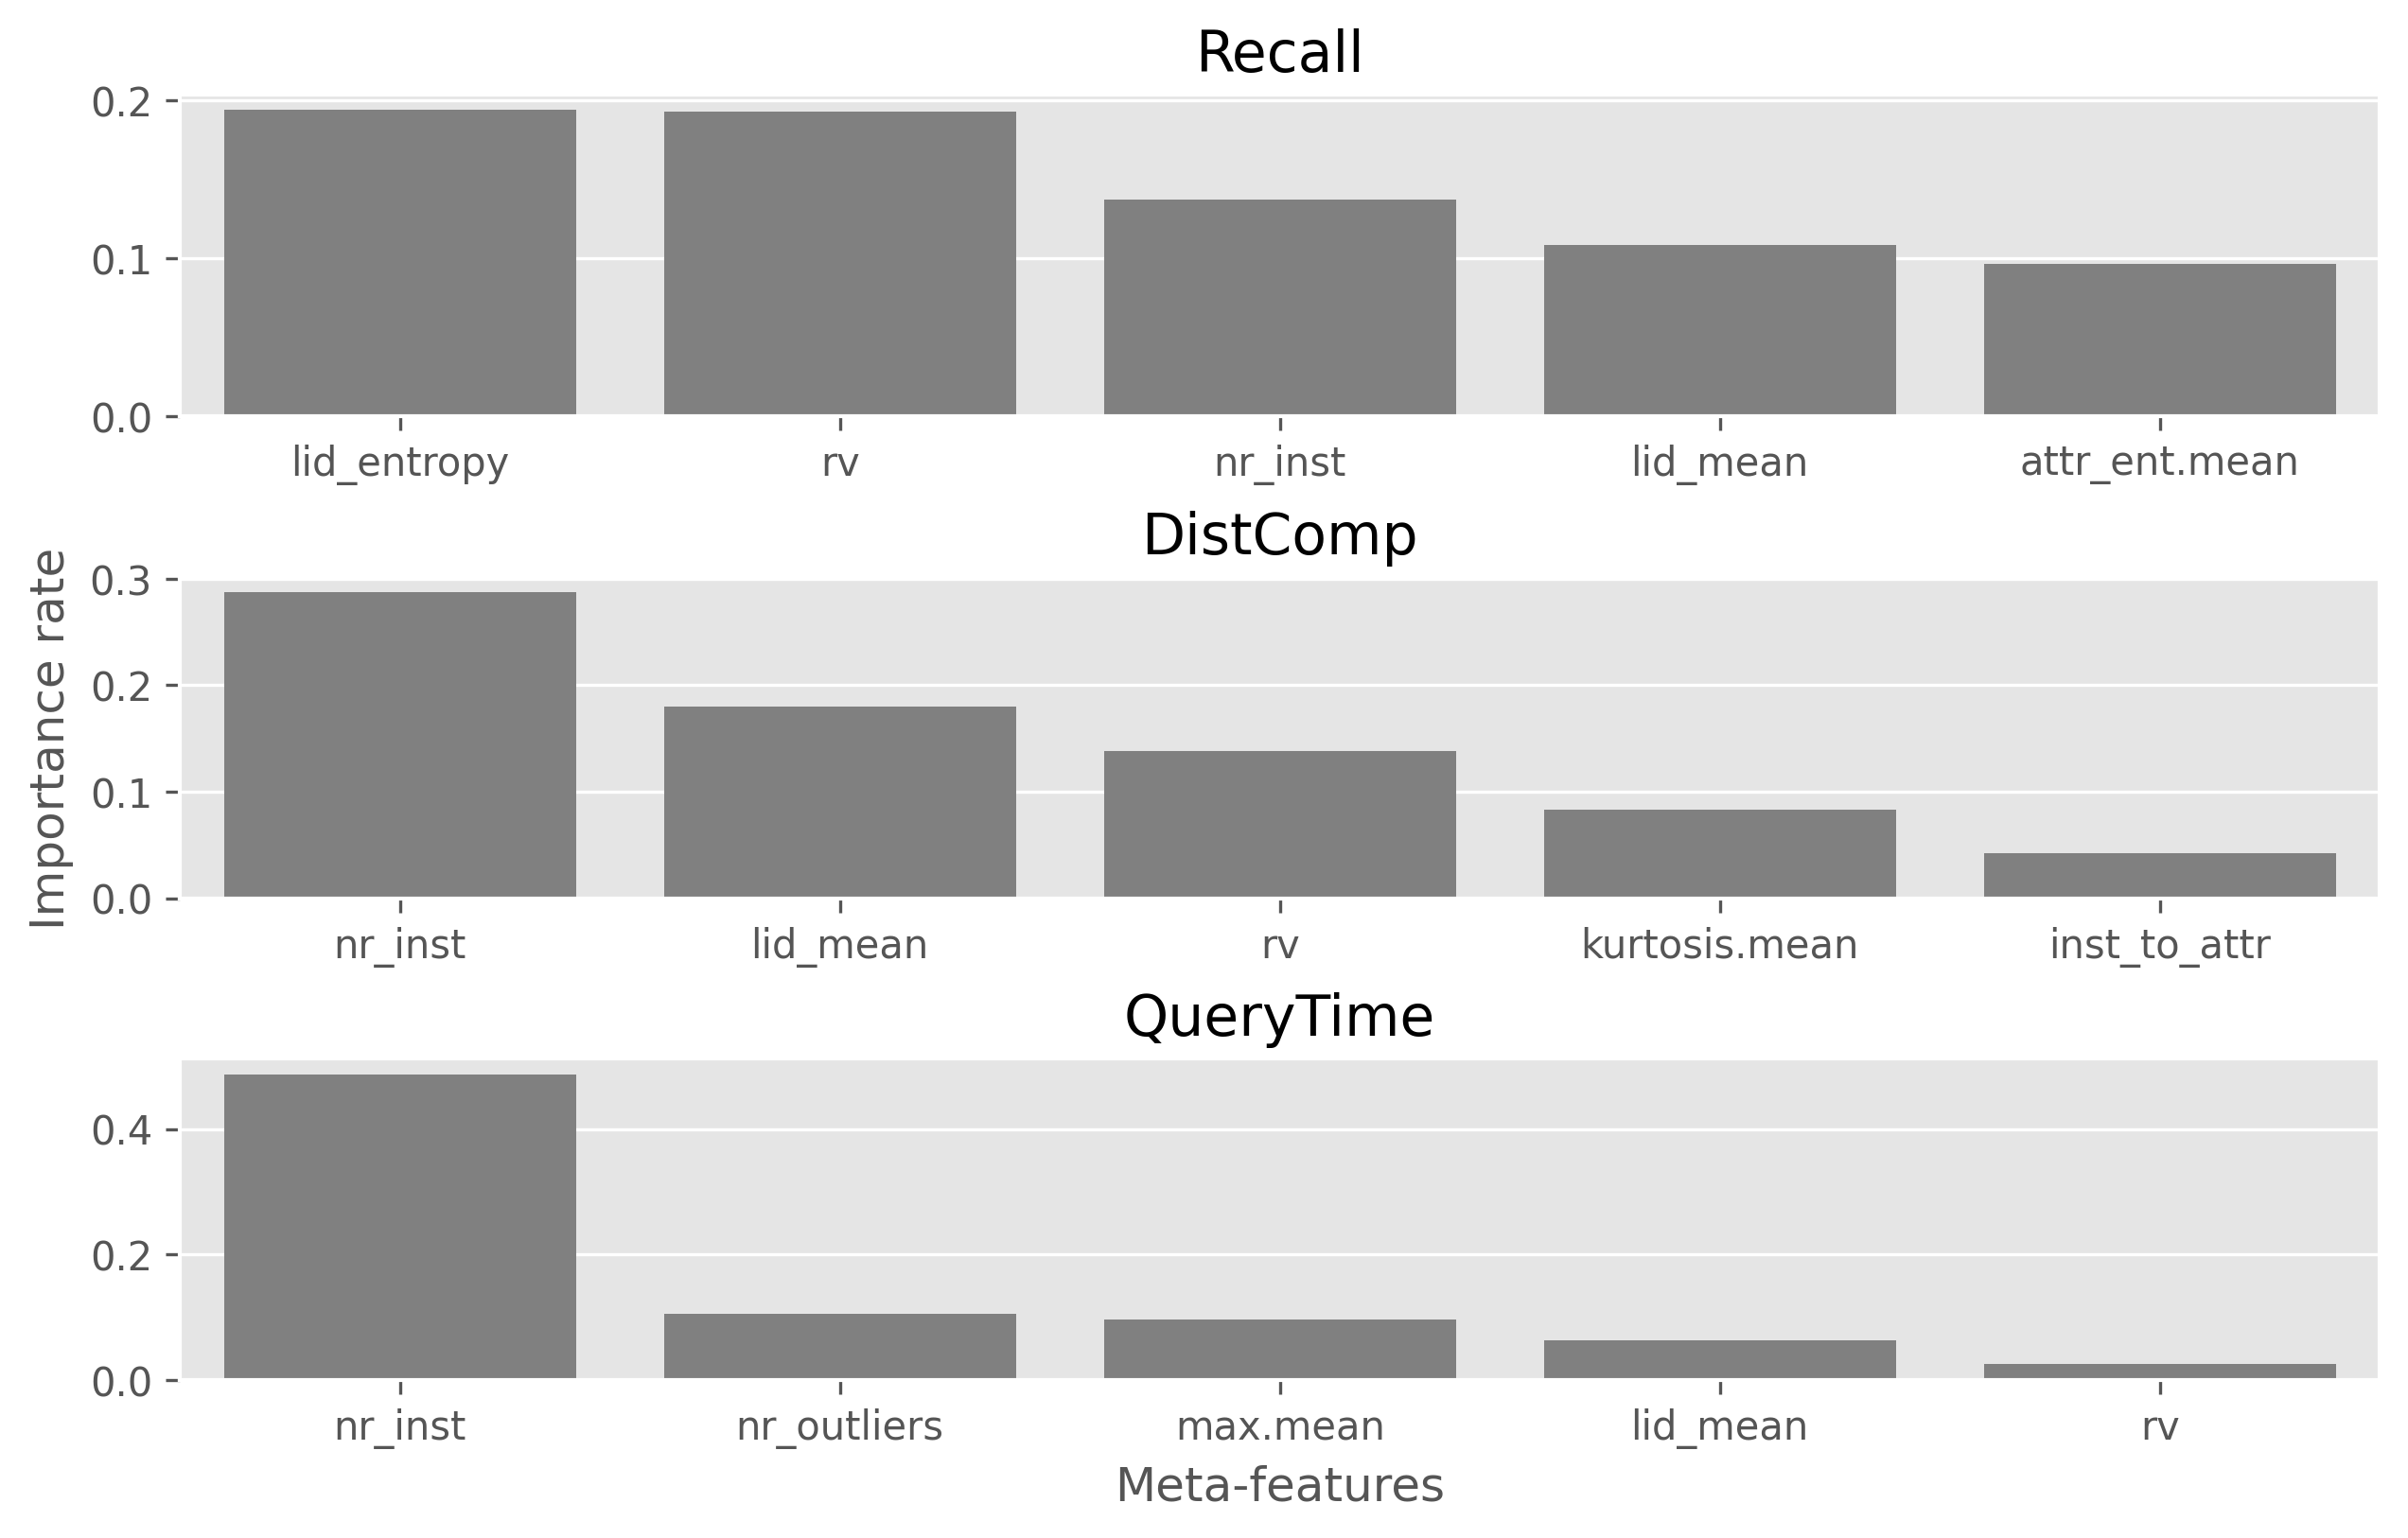

In [142]:
importances = pd.read_csv('data/feature_importances.csv')
importances.drop_duplicates(['feature', 'target'], inplace=True)
importances = importances[importances.target != 'IndexTime']
importances.groupby('target').importance.sum() #.value_counts()

fig, axes = plt.subplots(3,1,dpi=300,figsize=(10,6))
axes = iter(axes.reshape(-1))
plt.subplots_adjust(hspace=0.5)
for ax, target in zip(axes, importances.target.unique()):
    data = importances[importances.target == target].sort_values(by='importance', ascending=False).copy()
    data.importance = data.importance/data.importance.sum()
    data = data[data.importance >= data.importance.quantile(0.9)]
    sns.barplot(x='feature', y='importance', data=data, ax=ax, color='grey')
    # ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=30)
    ax.set_title(target)
    ax.set_xlabel('')
    if target == 'DistComp':
        ax.set_ylabel('Importance rate')
    else:
        ax.set_ylabel('')

ax.set_xlabel('Meta-features')
plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/feature_importances.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

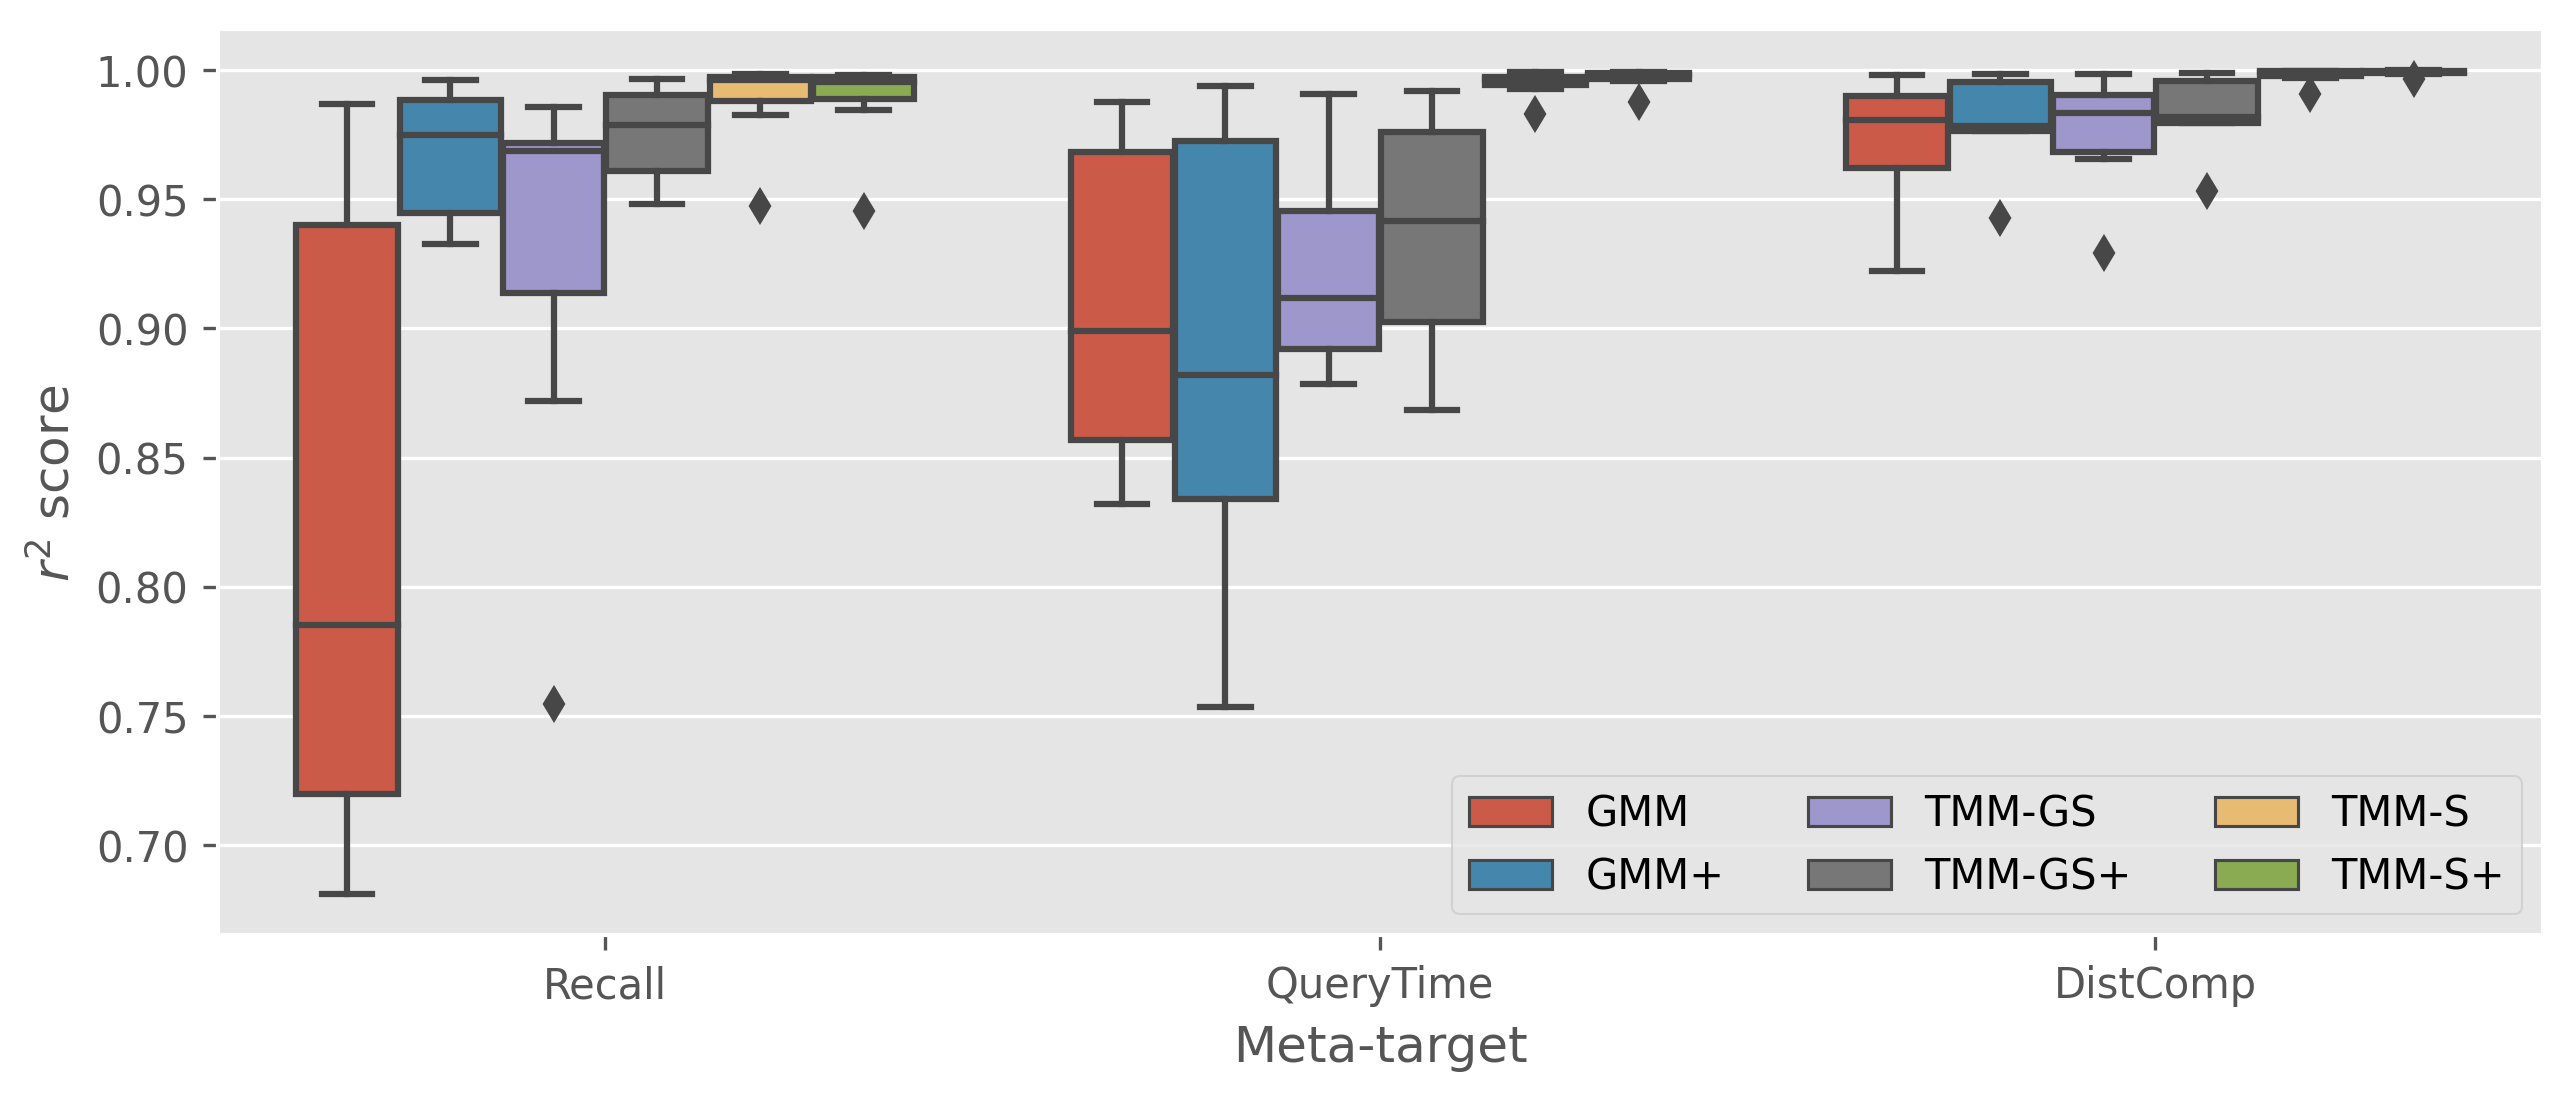

In [147]:
final_df = pd.read_csv('src/notebooks/dissertation/all_methods.csv') # see notebook overall_performance
approaches = {
    'gmm': 'GMM',
    'gmm+': 'GMM+',
    'tmmgs': 'TMM-GS',
    'tmmgs+': 'TMM-GS+',
    'tmms': 'TMM-S',
    'tmms+': 'TMM-S+',    
}
final_df.approach = final_df.approach.map(lambda x: approaches.get(x, x))

hue_order = ['GMM', 'GMM+', 'TMM-GS', 'TMM-GS+', 'TMM-S', 'TMM-S+']
plt.figure(figsize=(10, 4), dpi=300)
sns.boxplot(x='target', y='r2', hue='approach', hue_order=hue_order, data=final_df[final_df.target != 'IndexTime'])
plt.ylabel(r'$r^2$ score')
plt.xlabel('Meta-target')
plt.legend(loc='lower right', ncol=3)
plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/results/all_methods.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=300)

In [44]:
clus_scores[clus_scores.base == 'Syn74']

base        r2      rmse feature_selection_method       eps approach  \
117  Syn74  0.878158  0.097891                       rf  0.300000  TMM-GS+   
118  Syn74  0.171221  0.255308                       rf  0.300000     GMM+   
119  Syn74  0.171221  0.255308                       rf  0.300000   TMM-S+   
120  Syn74  0.929945  0.618593                       rf  0.291649  TMM-GS+   
121  Syn74  0.382302  1.836852                       rf  0.291649     GMM+   
122  Syn74  0.382302  1.836852                       rf  0.291649   TMM-S+   
123  Syn74  0.985007  0.269191                       rf  0.330513  TMM-GS+   
124  Syn74 -0.179858  2.387947                       rf  0.330513     GMM+   
125  Syn74 -0.179858  2.387947                       rf  0.330513   TMM-S+   

        target  cluster_size  elapsed_training  elapsed_inference  
117     Recall             3          1.397282           0.198647  
118     Recall             2          1.370897           0.194587  
119     Recall             2          1.344342           0.194337  
120   DistComp             3          1.384197           0.189828  
121   DistComp             2          1.354687           0.192027  
122   DistComp             2          1.393152           0.190957  
123  QueryTime             5          1.990465           0.186707  
124  QueryTime             4          1.898291           0.212000  
125  QueryTime             4          1.928404           0.188530

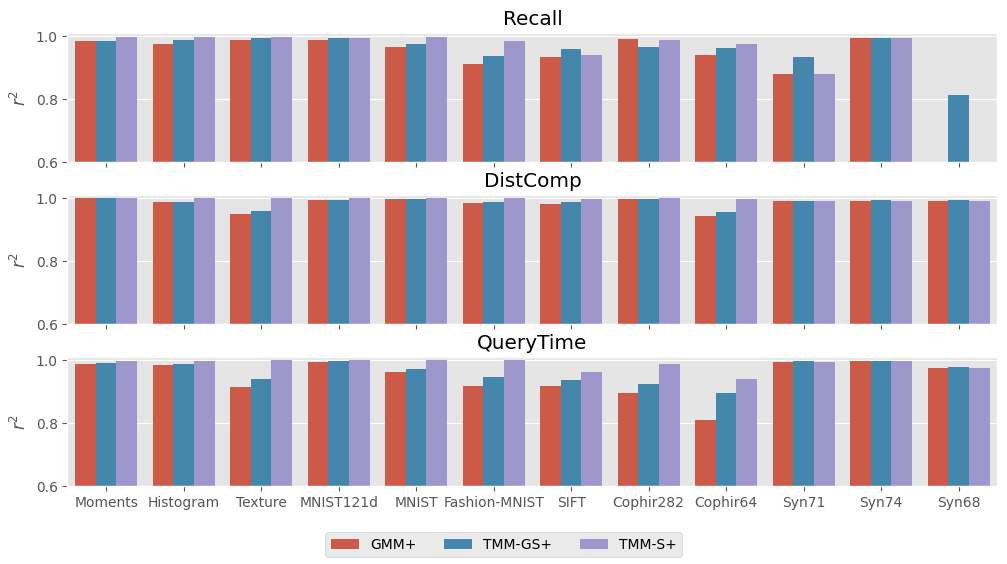

In [8]:
clus_scores = pd.read_csv('data/results/info_sys_interpolated/clustering_tuned/scores.csv')
clus_scores = clus_scores.rename(columns={'method': 'approach'})
clus_scores.base = clus_scores.base.apply(lambda x: x.split('_')[0])
clus_scores.approach = clus_scores.approach.apply(lambda x: x + '+')
clus_scores.drop_duplicates(['base', 'target', 'approach'], inplace=True)

datasets = {
    'texture': 'Texture',
    'moments': 'Moments',
    'colorHisto': 'Histogram',
    'sift': 'SIFT',
    'mnist': 'MNIST',
    'mnist121d': 'MNIST121d',
    'fashion': 'Fashion-MNIST',
    'cophir282': 'Cophir282',
    'cophir64': 'Cophir64',
    'base71': 'Syn71', 
    'base74': 'Syn74', 
    'base68': 'Syn68'
}
clus_scores.base = clus_scores.base.map(lambda x: datasets.get(x, x))

approaches = {
    'gmm': 'GMM',
    'gmm+': 'GMM+',
    'tmmgs': 'TMM-GS',
    'tmmgs+': 'TMM-GS+',
    'tmms': 'TMM-S',
    'tmms+': 'TMM-S+',    
}
clus_scores.approach = clus_scores.approach.map(lambda x: approaches.get(x, x))
data_order = ['Moments', 'Histogram', 'Texture', 'MNIST121d', 'MNIST', 'Fashion-MNIST', 'SIFT', 'Cophir282', 'Cophir64', 'Syn71', 'Syn74', 'Syn68']
clus_scores.set_index('base', inplace=True)
clus_scores = clus_scores.loc[data_order, :].reset_index()

hue_order = ['GMM+', 'TMM-GS+', 'TMM-S+']

# clus_scores.approach.unique()
fig, axes = plt.subplots(3,1,figsize=(12,6), dpi=100, sharex=True, sharey=True)
plt.ylim(0.6, 1.01)
axes = iter(axes.reshape(-1))
l_gambeta = []
clus_scores = clus_scores[clus_scores.target != 'IndexTime']
for target in clus_scores.target.unique():
    ax = next(axes)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=0)
    l_gambeta.append(ax)
    sns.barplot(x='base', y='r2', hue='approach', hue_order=hue_order, data=clus_scores[clus_scores.target == target], ax=ax)
    ax.set_title(target)
    ax.set_xlabel('')
    ax.set_ylabel(r'$r^2$')
    ax.get_legend().remove()

# l_gambeta = np.array(l_gambeta) #.reshape(2,2)
# plt.setp(l_gambeta[-1, :], xlabel='  ')
# plt.setp(l_gambeta[:, 0], ylabel=r'$r^2$ score')
# plt.setp(l_gambeta[:-1, :], xlabel='')
# plt.setp(l_gambeta[:, 1:], ylabel='')

plt.subplots_adjust(wspace=0.05, hspace=0.25)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
# plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/results/predictive_performances.pdf', bbox_inches = 'tight', dpi=100)

In [30]:
recommendation_time = pd.read_csv('src/notebooks/dissertation/recommendation_time.csv')

- tt = training time
- rt = recommendation time

In [31]:
approaches = {
    'gmm': 'GMM',
    'gmm+': 'GMM+',
    'tmmgs': 'TMM-GS',
    'tmmgs+': 'TMM-GS+',
    'tmms': 'TMM-S',
    'tmms+': 'TMM-S+',    
    'gs': 'GridSearch'
}
recommendation_time.approach = recommendation_time.approach.map(lambda x: approaches.get(x, x))

datasets = {
    'texture': 'Texture',
    'moments': 'Moments',
    'colorHisto': 'Histogram',
    'sift': 'SIFT',
    'mnist': 'MNIST',
    'mnist121d': 'MNIST121d',
    'fashion': 'Fashion-MNIST'
}
recommendation_time.base = recommendation_time.base.map(lambda x: datasets.get(x, x))
recommendation_time.head()

base    approach        ix_time     qt_time     total_time  \
0        Texture  GridSearch     672.212183   58.120384     730.332566   
1           SIFT  GridSearch  373003.271593  131.390521  373134.662114   
2        Moments  GridSearch     673.761353   40.515727     714.277080   
3      MNIST121d  GridSearch    2225.818330   69.526488    2295.344818   
4  Fashion-MNIST  GridSearch   11577.963441  226.745382   11804.708823   

   tt_recall  rt_recall  tt_querytime  rt_querytime  tt_indextime  \
0        0.0        0.0           0.0           0.0           0.0   
1        0.0        0.0           0.0           0.0           0.0   
2        0.0        0.0           0.0           0.0           0.0   
3        0.0        0.0           0.0           0.0           0.0   
4        0.0        0.0           0.0           0.0           0.0   

   rt_indextime  tt_distcomp  rt_distcomp  
0           0.0          0.0          0.0  
1           0.0          0.0          0.0  
2           0.0          0.0          0.0  
3           0.0          0.0          0.0  
4           0.0          0.0          0.0

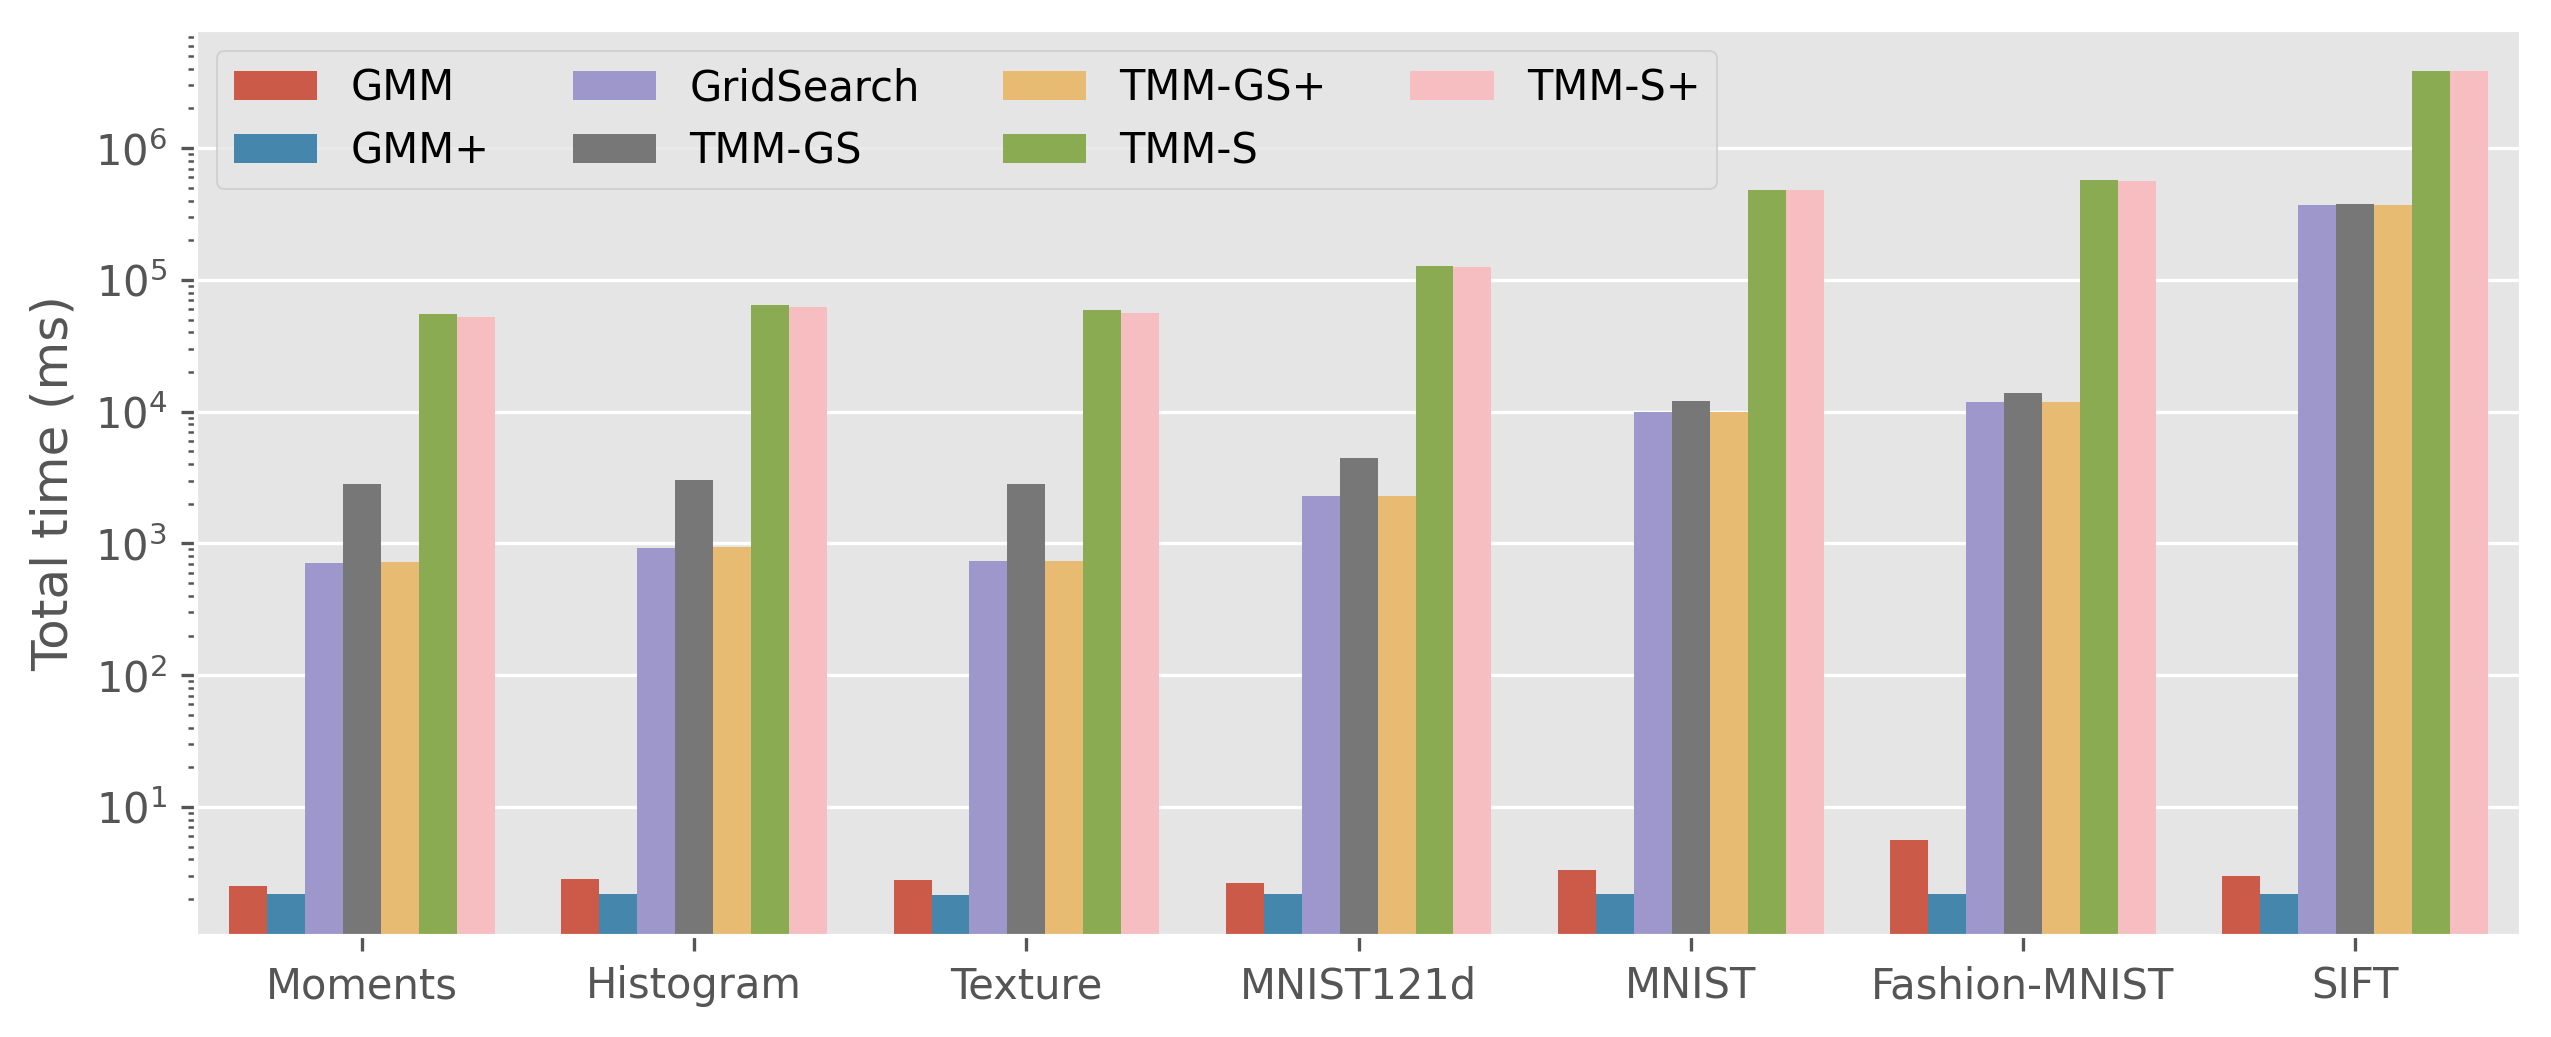

In [32]:
hue_order = ['GMM', 'GMM+', 'GridSearch', 'TMM-GS', 'TMM-GS+', 'TMM-S', 'TMM-S+']
data_order = ['Moments', 'Histogram', 'Texture', 'MNIST121d', 'MNIST', 'Fashion-MNIST', 'SIFT']

recommendation_time.set_index('base', inplace=True)
recommendation_time = recommendation_time.loc[data_order, :].reset_index()
plt.figure(figsize=(10,4), dpi=300)
plt.yscale('log')
sns.barplot(x='base', y='total_time', hue='approach', hue_order=hue_order, data=recommendation_time)
# sns.pointplot(x='base', y='total_time', hue='approach', hue_order=hue_order, data=recommendation_time, scale=1, linestyles='--', markers=["*", "^", "D", ",", ".", "v", "+"])
plt.xlabel('')
plt.ylabel('Total time (ms)')
plt.legend(loc='upper left', ncol=4)
# plt.savefig('/home/seidi/Repositories/Mestrado_quali/figures/journal/results/recommendation_time.pdf', bbox_inches = 'tight', dpi=100)

In [57]:
recommendation_time[recommendation_time.approach.isin(['TMM-S', 'TMM-S+'])]

base approach       ix_time       qt_time    total_time  \
5         Moments    TMM-S  3.596739e+04  16554.208515  5.470308e+04   
6         Moments   TMM-S+  3.596739e+04  16554.208515  5.254352e+04   
12      Histogram    TMM-S  4.392017e+04  18610.067383  6.472419e+04   
13      Histogram   TMM-S+  4.392017e+04  18610.067383  6.255436e+04   
19        Texture    TMM-S  3.571721e+04  20733.701878  5.866137e+04   
20        Texture   TMM-S+  3.571721e+04  20733.701878  5.647419e+04   
26      MNIST121d    TMM-S  9.915132e+04  25318.309193  1.266879e+05   
27      MNIST121d   TMM-S+  9.915132e+04  25318.309193  1.244927e+05   
33          MNIST    TMM-S  4.228802e+05  55424.614112  4.804727e+05   
34          MNIST   TMM-S+  4.228802e+05  55424.614112  4.783444e+05   
40  Fashion-MNIST    TMM-S  4.908780e+05  76772.873143  5.698203e+05   
41  Fashion-MNIST   TMM-S+  4.908780e+05  76772.873143  5.676722e+05   
47           SIFT    TMM-S  3.821166e+06  26953.980382  3.850299e+06   
48           SIFT   TMM-S+  3.821166e+06  26953.980382  3.848136e+06   

     tt_recall  rt_recall  tt_querytime  rt_querytime  tt_indextime  \
5   537.496655   0.542608    604.894007      0.769240    434.606183   
6     4.910547   0.541659      7.172590      0.538851      1.981686   
12  543.451423   0.554697    586.769955      0.883472    437.273797   
13    4.835773   0.538785      9.669981      0.540548      2.334720   
19  552.716302   0.539898    593.795192      0.971097    440.484892   
20    4.741943   0.529847      8.648716      0.538234      2.219107   
26  558.970567   0.543261    602.970288      1.287294    438.731982   
27    4.887724   0.538225      5.992064      0.543152      2.112503   
33  544.865966   0.539838    582.950020      0.788845    426.834337   
34    9.550766   0.543771     11.287611      0.542698      4.887633   
40  551.617418   0.544210    581.958327      0.780607    442.966902   
41    4.911010   0.539306      5.663268      0.536644      2.675379   
47  548.354432   0.536811    590.101182      0.689192    429.270301   
48    3.235824   0.537398      3.894787      0.532215      1.635782   

    rt_indextime  tt_distcomp  rt_distcomp  
5       0.541165   600.665237     1.964761  
6       0.539084     5.688533     0.543714  
12      0.541394   622.504537     1.975419  
13      0.531908     5.133671     0.543256  
19      0.543702   620.131115     1.276781  
20      0.539696     5.524910     0.531884  
26      0.540211   613.557365     1.677267  
27      0.538057     7.924786     0.536885  
33      0.544269   609.198285     2.088921  
34      0.540548    11.660363     0.530436  
40      0.539210   588.830313     2.174583  
41      0.542792     5.908608     0.544860  
47      0.542647   607.954621     2.058928  
48      0.528696     5.779606     0.539360